#### Import the Libraries

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#### Load The Data

In [2]:
data_file=r'zomato_pune_V002.csv'
zp=pd.read_csv(data_file)


#### Data Exploration 

#### Exploratory Data Analysis (EDA)

In [3]:
zp.head()

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,1,0,0,0,0,0,132.0


In [4]:
zp.tail()

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
12184,Nil Food Point,https://www.zomato.com/pune/nil-food-point-hin...,Hinjawadi,"Takeaway, Delivery",0,0,+91 9112898153,Chinese,Not Present,Cash and Digital Payments accepted,...,0,0,0,0,0,0,0,0,0,0.0
12185,Flirty Momo,https://www.zomato.com/pune/flirty-momo-kharadi,Kharadi,"Takeaway, Delivery",0,0,+91 8237524902,"Mongolian, Pizza, Chinese, Beverages",Not Present,Cash only,...,0,0,0,0,0,0,0,0,0,0.0
12186,Hunger Treat,https://www.zomato.com/pune/hunger-treat-katraj,Katraj,Quick Bites,0,0,+91 7721098589,"South Indian, Fast Food, Chinese",₹300,Cash and Digital Payments accepted,...,0,0,0,0,0,0,0,0,0,0.0
12187,Bungalow 424,https://www.zomato.com/pune/bungalow-424-kothrud,Kothrud,"Casual Dining, Bar",0,0,+91 7709367942,"North Indian, Fast Food, Continental","₹1,200","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,0.0
12188,Desi Shakes By KB,https://www.zomato.com/pune/desi-shakes-by-kb-...,Bavdhan,Beverage Shop,0,0,+91 8141964335,Beverages,₹200,Cash and Digital Payments accepted,...,0,0,0,0,0,0,0,0,0,0.0


In [5]:
zp.shape

(12189, 104)

In [6]:
zp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Columns: 104 entries, Restaurant_Name to spam_review
dtypes: float64(1), int64(86), object(17)
memory usage: 9.7+ MB


In [7]:
zp.columns

Index(['Restaurant_Name', 'Web_Link', 'Locality', 'Sponsored',
       'Ratings_out_of_5', 'Number of votes', 'Phone_number', 'Cuisines',
       'Charges_for_two', 'payment_modes',
       ...
       'Table booking recommended', 'Resto Bar', 'Serves Alcohol', 'Breakfast',
       'Catering Available', 'Disabled Friendly', 'Serves Halal',
       'Takeaway Only', 'BYOB Only', 'spam_review'],
      dtype='object', length=104)

 Analyse Some basic Information about the data, while analysing this data has some unnecessary columns that we have to figure out and remove from the data

In [8]:
#Removing some unnecesary columns:
del zp['Web_Link']
del zp['Phone_number']
del zp['Detail_address']
del zp['5_star_review_percentage']
del zp['4_star_review_percentage']
del zp['3_star_review_percentage']
del zp['2_star_review_percentage']
del zp['1_star_review_percentage']




In [9]:
#Check the data type(Dtype)
zp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Restaurant_Name                 12189 non-null  object 
 1   Locality                        12189 non-null  object 
 2   Sponsored                       12189 non-null  object 
 3   Ratings_out_of_5                12189 non-null  object 
 4   Number of votes                 12189 non-null  object 
 5   Cuisines                        12189 non-null  object 
 6   Charges_for_two                 12189 non-null  object 
 7   payment_modes                   12189 non-null  object 
 8   Rest_timming                    12189 non-null  object 
 9   Wine and Beer                   12189 non-null  int64  
 10  Dance Floor                     12189 non-null  int64  
 11  Lunch Menu                      12189 non-null  int64  
 12  Outdoor Seating                 

In [10]:
#Here , the data is too much so we just see, how many unique catergories in each columns 

for col in zp.columns:
    print(col,': ',len(zp[col].unique()),'labels')

Restaurant_Name :  11163 labels
Locality :  99 labels
Sponsored :  81 labels
Ratings_out_of_5 :  34 labels
Number of votes :  1036 labels
Cuisines :  2560 labels
Charges_for_two :  63 labels
payment_modes :  12 labels
Rest_timming :  1329 labels
Wine and Beer :  2 labels
Dance Floor :  2 labels
Lunch Menu :  2 labels
Outdoor Seating :  2 labels
Seaside :  2 labels
4/5 Star :  2 labels
Free Parking :  2 labels
Pet Friendly :  2 labels
Bulk Orders Accepted :  2 labels
Gaming Are :  2 labels
City View :  2 labels
Vegetarian Only :  2 labels
Brunch :  2 labels
Live Music :  2 labels
Wheelchair Accessible :  2 labels
Home Delivery :  2 labels
Celebrity Frequented :  2 labels
Pre-Ordering Required :  2 labels
Pool Table :  2 labels
Keto Options :  2 labels
Wifi :  2 labels
Sports TV :  2 labels
Wine Tasting :  2 labels
Beer :  2 labels
Restricted Entry :  2 labels
Variable Menu :  2 labels
Serves Non Veg :  2 labels
Table booking for Groups :  2 labels
Poolside :  2 labels
Home Baker :  2 la

In [11]:
#let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(zp,drop_first=True).shape

(12189, 16455)

#### as the column number increases that leads to curse of dimensionality"

Here, some columns have data_type(dtype) is object ,we have to convert it into Numeric Data Type and then we do some 
exploration with this data and visualization also

#### Examine: Sponsored

In [12]:
zp['Sponsored'].value_counts()

Quick Bites                   5466
Casual Dining                 2279
Takeaway, Delivery            1071
Delivery                       908
Café                           334
                              ... 
Microbrewery, Pub                1
Club, Lounge                     1
Café, Lounge                     1
Microbrewery                     1
Dessert Parlor, Sweet Shop       1
Name: Sponsored, Length: 81, dtype: int64

In [13]:
#Null Values:
zp['Sponsored'].isnull().sum()

0

#### One Hot Encoding : Sponsored

In [14]:
#Let's Do One Hot Encoding:
#let's find the top 20 most frequent categories for column: Ratings_out_of_5
zp.Sponsored.value_counts().sort_values(ascending=False).head(20)


Quick Bites                   5466
Casual Dining                 2279
Takeaway, Delivery            1071
Delivery                       908
Café                           334
Casual Dining, Bar             315
Bakery                         260
Dessert Parlor                 247
Bar, Casual Dining             173
Food Court                     163
Takeaway                       120
Sweet Shop                      88
Beverage Shop                   82
Food Truck                      65
Dhaba                           59
Kiosk                           44
Bakery, Dessert Parlor          42
Lounge                          38
Bar                             29
Beverage Shop, Quick Bites      26
Name: Sponsored, dtype: int64

In [15]:
# Let's make a list with the most frequent categories of the variable

top_20=[x for x in zp.Sponsored.value_counts().sort_values(ascending=False).head(20).index ]
top_20

['Quick Bites',
 'Casual Dining',
 'Takeaway, Delivery',
 'Delivery',
 'Café',
 'Casual Dining, Bar',
 'Bakery',
 'Dessert Parlor',
 'Bar, Casual Dining',
 'Food Court',
 'Takeaway',
 'Sweet Shop',
 'Beverage Shop',
 'Food Truck',
 'Dhaba',
 'Kiosk',
 'Bakery, Dessert Parlor',
 'Lounge',
 'Bar',
 'Beverage Shop, Quick Bites']

In [16]:
# and now we make the 20 binary columns:

for label in top_20:
       zp[label]=np.where(zp['Sponsored']== label,1,0)
        
zp[['Sponsored']+top_20].head(20)

,Sponsored,Quick Bites,Casual Dining,"Takeaway, Delivery",Delivery,Café,"Casual Dining, Bar",Bakery,Dessert Parlor,"Bar, Casual Dining",...,Takeaway,Sweet Shop,Beverage Shop,Food Truck,Dhaba,Kiosk,"Bakery, Dessert Parlor",Lounge,Bar,"Beverage Shop, Quick Bites"
0,Casual Dining,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Lounge, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fine Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Casual Dining, Bar",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bar, Casual Dining",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,"Bar, Casual Dining",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Casual Dining,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"Pub, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Bakery,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Casual Dining,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# get whole set of dummy variables, for all the categorical variables:

def one_hot_top_x(zp,variable,top_x_labels):
    #function to create the dummy variables for the most frequent labels
    #we can varry the number of most frequent labels that we encode
    
    for label in top_x_labels:
        zp[variable+'_'+label]= np.where(zp[variable]== label,1,0)
        
#read the data again
data_file=r'zomato_pune_V002.csv'

#encode Sponsored into the 20 most frequent categories
one_hot_top_x(zp,'Sponsored',top_20)
zp.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,Charges_for_two,payment_modes,Rest_timming,Wine and Beer,...,Sponsored_Takeaway,Sponsored_Sweet Shop,Sponsored_Beverage Shop,Sponsored_Food Truck,Sponsored_Dhaba,Sponsored_Kiosk,"Sponsored_Bakery, Dessert Parlor",Sponsored_Lounge,Sponsored_Bar,"Sponsored_Beverage Shop, Quick Bites"
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029 votes,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm",0,...,0,0,0,0,0,0,0,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,11am – 4am,0,...,0,0,0,0,0,0,0,0,0,0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291 votes,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,0,...,0,0,0,0,0,0,0,0,0,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",12noon – 1am,0,...,0,0,0,0,0,0,0,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",9am – 1am,0,...,0,0,0,0,0,0,0,0,0,0


#### Examine :Ratings_out_of_5

In [18]:
# Ratings_out_of_5 : convert the dtype
zp['Ratings_out_of_5'] = pd.to_numeric(zp['Ratings_out_of_5'], errors='coerce')

In [19]:
zp['Ratings_out_of_5'].unique()

array([4.9, 4.6, 4.3, 4.5, 4. , 4.7, 4.2, 4.4, 4.1, 3.7, 0. , 4.8, 3.9,
       3.6, 3.4, 3.8, 2.9, 3.5, 3.2, 3.3, 2.1, 2.5, 2.4, 3. , 3.1, 2.7,
       2.6, 2.8, 2.3, nan, 2.2, 2. ])

In [20]:
len(zp['Ratings_out_of_5'])

12189

In [21]:
zp['Ratings_out_of_5'].value_counts()

0.0    1208
3.2     735
3.3     731
3.4     729
3.5     677
3.1     666
3.6     602
3.7     534
3.0     511
3.8     446
2.9     391
3.9     390
4.0     259
2.8     200
4.1     181
4.2     150
2.7      98
4.3      92
4.4      83
2.6      61
4.5      47
2.5      31
4.6      30
2.4      17
2.3      13
4.7      12
4.8       9
2.2       8
4.9       6
2.1       2
2.0       1
Name: Ratings_out_of_5, dtype: int64

In [22]:
zp['Ratings_out_of_5'].isnull().sum()

3269

#### Here , We have 3269 'nan' values out of 12189 values ,so we have to drop them

In [23]:
# Remove the NaN values from the "Ratings_out_of_5" column
zp.dropna(subset=['Ratings_out_of_5'], inplace=True)

#### Examine: Locality

In [24]:
zp['Locality'].unique()

array(['Hinjawadi', 'Bhugaon', 'Senapati Bapat Road', 'Shivaji Nagar',
       'Wakad', 'East Street', 'Yerawada', 'Bavdhan', 'Kalyani Nagar',
       'Narhe', 'Bund Garden Road', 'Viman Nagar', 'Magarpatta',
       'Deccan Gymkhana', 'Hadapsar', 'Baner', 'Sus', 'Shivapur',
       'Mundhwa', 'FC Road', 'Kothrud', 'Koregaon Park', 'Erandwane',
       'MG Road', 'Karve Nagar', 'Sadashiv Peth', 'Pune University',
       'JM Road', 'Dhole Patil Road', 'Camp Area', 'Pimple Saudagar',
       'Kharadi', 'Ravet', 'Aundh', 'Nigdi', 'Kondhwa', 'Swargate',
       'Katraj', 'Khadki', 'Salunkhe Vihar Road', 'Law College Road',
       'Pimple Nilakh', 'Pashan', 'Lonavala', 'NIBM Road', 'Balewadi',
       'Dange Chowk', 'SB Road - Aundh', 'Pimpri Chinchwad Area',
       'Wadgaon Sheri', 'Pimpri', 'Wanowrie Kondhwa Area', 'Chinchwad',
       'Chandan Nagar', 'Fatima Nagar', 'Budhwar Peth', 'Warje',
       'Wagholi', 'Akurdi', 'Bibvewadi', 'Rasta Peth', 'KP and Kalyani',
       'Sinhgad Road', 'Model Col

In [25]:
zp['Locality'].value_counts().head(20)

Kothrud            448
Hadapsar           400
Wakad              396
Viman Nagar        387
Hinjawadi          351
Kharadi            334
Baner              331
Sinhgad Road       308
Chinchwad          212
Pimple Saudagar    201
Pimpri             200
Kondhwa            200
Katraj             189
Wagholi            180
Aundh              171
Wadgaon Sheri      162
Karve Nagar        160
Koregaon Park      152
Bavdhan            142
Bhosari            140
Name: Locality, dtype: int64

In [26]:
zp['Locality'].isnull().sum()

0

#### One Hot Encoding: Locality

In [27]:
#find the 20 most frequent categories for 'Locality'

top_20=[x for x in zp.Locality.value_counts().sort_values(ascending=False).head(20).index ]

#now create the 20 most frequent dummy variables for 'Locality'

one_hot_top_x(zp,'Locality',top_20)
zp.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,Charges_for_two,payment_modes,Rest_timming,Wine and Beer,...,Locality_Pimpri,Locality_Kondhwa,Locality_Katraj,Locality_Wagholi,Locality_Aundh,Locality_Wadgaon Sheri,Locality_Karve Nagar,Locality_Koregaon Park,Locality_Bavdhan,Locality_Bhosari
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029 votes,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm",0,...,0,0,0,0,0,0,0,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,11am – 4am,0,...,0,0,0,0,0,0,0,0,0,0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291 votes,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,0,...,0,0,0,0,0,0,0,0,0,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",12noon – 1am,0,...,0,0,0,0,0,0,0,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",9am – 1am,0,...,0,0,0,0,0,0,0,0,0,0


#### Examine: Cuisines

In [28]:
zp['Cuisines'].unique()

array(['Continental, North Indian, Chinese',
       'North Indian, Chinese, Continental, Kebab, Seafood',
       'North Indian, Kebab, Biryani', ...,
       'North Indian, Chinese, Kebab, Biryani',
       'Mongolian, Pizza, Chinese, Beverages',
       'North Indian, Fast Food, Continental'], dtype=object)

In [29]:
zp['Cuisines'].value_counts().head(20)

North Indian, Chinese               623
North Indian                        536
Fast Food                           367
Chinese                             317
Street Food                         265
Maharashtrian                       251
Biryani                             151
Chinese, North Indian               128
Fast Food, Beverages                127
South Indian                        126
Bakery                              104
Maharashtrian, North Indian          99
Bakery, Desserts                     87
North Indian, Maharashtrian          85
North Indian, Chinese, Mughlai       80
North Indian, Fast Food              72
North Indian, Chinese, Fast Food     65
North Indian, Chinese, Seafood       65
Cafe                                 63
Biryani, North Indian                60
Name: Cuisines, dtype: int64

In [30]:
zp['Cuisines'].isnull().sum()

0

#### One Hot Encoding: Cuisines

In [31]:
#find the 20 most frequent categories for 'Locality'

top_20=[x for x in zp.Cuisines.value_counts().sort_values(ascending=False).head(20).index ]

#now create the 20 most frequent dummy variables for 'Locality'

one_hot_top_x(zp,'Cuisines',top_20)
zp.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,Charges_for_two,payment_modes,Rest_timming,Wine and Beer,...,Cuisines_Bakery,"Cuisines_Maharashtrian, North Indian","Cuisines_Bakery, Desserts","Cuisines_North Indian, Maharashtrian","Cuisines_North Indian, Chinese, Mughlai","Cuisines_North Indian, Fast Food","Cuisines_North Indian, Chinese, Fast Food","Cuisines_North Indian, Chinese, Seafood",Cuisines_Cafe,"Cuisines_Biryani, North Indian"
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029 votes,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm",0,...,0,0,0,0,0,0,0,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,11am – 4am,0,...,0,0,0,0,0,0,0,0,0,0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291 votes,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,0,...,0,0,0,0,0,0,0,0,0,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",12noon – 1am,0,...,0,0,0,0,0,0,0,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",9am – 1am,0,...,0,0,0,0,0,0,0,0,0,0


#### Examine: payment_modes

In [32]:
zp['payment_modes'].unique()

array(['Cash and Cards accepted',
       'Cash,Cards and Digital Payments accepted', 'Cash only',
       'Cash and Digital Payments accepted',
       'Cash,Cards and Meal Coupons accepted',
       'Cash,Cards,Meal Coupons and Digital Payments accepted',
       'Cash,Debit Cards and Digital Payments accepted',
       'Cash and Debit Cards accepted', 'Cash and Meal Coupons accepted',
       'Debit Cards accepted',
       'Cash,Meal Coupons and Digital Payments accepted', 'Cards only'],
      dtype=object)

In [33]:
zp['payment_modes'].value_counts()

Cash only                                                2372
Cash,Cards and Digital Payments accepted                 2220
Cash and Cards accepted                                  2123
Cash and Digital Payments accepted                       1953
Cash,Cards and Meal Coupons accepted                      103
Cash,Debit Cards and Digital Payments accepted             62
Cash,Cards,Meal Coupons and Digital Payments accepted      50
Cash and Debit Cards accepted                              26
Cash and Meal Coupons accepted                              6
Cash,Meal Coupons and Digital Payments accepted             3
Debit Cards accepted                                        1
Cards only                                                  1
Name: payment_modes, dtype: int64

In [34]:
zp['payment_modes'].isnull().sum()

0

#### One Hot ENcoding :payment_modes

In [35]:
#create dummy columns:
payment_modes_dummies=pd.get_dummies(zp['payment_modes'],prefix='payment_modes')
payment_modes_dummies

,payment_modes_Cards only,payment_modes_Cash and Cards accepted,payment_modes_Cash and Debit Cards accepted,payment_modes_Cash and Digital Payments accepted,payment_modes_Cash and Meal Coupons accepted,payment_modes_Cash only,"payment_modes_Cash,Cards and Digital Payments accepted","payment_modes_Cash,Cards and Meal Coupons accepted","payment_modes_Cash,Cards,Meal Coupons and Digital Payments accepted","payment_modes_Cash,Debit Cards and Digital Payments accepted","payment_modes_Cash,Meal Coupons and Digital Payments accepted",payment_modes_Debit Cards accepted
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12184,0,0,0,1,0,0,0,0,0,0,0,0
12185,0,0,0,0,0,1,0,0,0,0,0,0
12186,0,0,0,1,0,0,0,0,0,0,0,0
12187,0,0,0,0,0,0,1,0,0,0,0,0


In [36]:
#drop unnecessary columns :payment_modes_dummies
payment_modes_dummies=payment_modes_dummies.drop(['payment_modes_Cards only','payment_modes_Debit Cards accepted',
                                                  'payment_modes_Cash,Meal Coupons and Digital Payments accepted',
                                                  'payment_modes_Cash and Meal Coupons accepted'],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_32332\1816057454.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  payment_modes_dummies=payment_modes_dummies.drop(['payment_modes_Cards only','payment_modes_Debit Cards accepted',


In [37]:
zp= pd.concat([zp,payment_modes_dummies],axis=1)

In [38]:
del payment_modes_dummies

#### Examine: Number of votes

In [39]:
zp['Number of votes'].unique()

array(['7029  votes', '2578  votes', '3291  votes', ..., '249  votes',
       '379  votes', 'Based on 61 votes'], dtype=object)

In [40]:
zp['Number of votes'].value_counts()

0                    1225
Based on 4 votes      328
Based on 6 votes      254
Based on 5 votes      234
Based on 7 votes      192
                     ... 
1235  votes             1
1819  votes             1
1887  votes             1
1814  votes             1
Based on 61 votes       1
Name: Number of votes, Length: 1036, dtype: int64

Here , we have some words that we have to remove from the column and then convert it into numeric

In [41]:
# Remove specific words from the "Number of votes" column
zp['Number of votes'] = zp['Number of votes'].str.replace('votes', '').str.replace('Based on', '')

# Convert the column to numeric data type
zp['Number of votes'] = pd.to_numeric(zp['Number of votes'], errors='coerce')


In [42]:
zp['Number of votes'].value_counts()

0.0       1225
4.0        423
6.0        293
5.0        277
7.0        243
          ... 
824.0        1
2521.0       1
282.0        1
1786.0       1
379.0        1
Name: Number of votes, Length: 875, dtype: int64

In [43]:
zp['Number of votes'].isnull().sum()

7

In [44]:
#remove the null values:
zp.dropna(subset=['Number of votes'], inplace=True)

#### One Hot ENcoding : Number of votes

In [45]:
#find the 20 most frequent categories for 'Locality'

top_20=[x for x in zp.Cuisines.value_counts().sort_values(ascending=False).head(20).index ]

#now create the 20 most frequent dummy variables for 'Locality'

one_hot_top_x(zp,'Number of votes',top_20)
zp.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,Charges_for_two,payment_modes,Rest_timming,Wine and Beer,...,Number of votes_Bakery,"Number of votes_Maharashtrian, North Indian","Number of votes_Bakery, Desserts","Number of votes_North Indian, Maharashtrian","Number of votes_North Indian, Chinese, Mughlai","Number of votes_North Indian, Fast Food","Number of votes_North Indian, Chinese, Fast Food","Number of votes_North Indian, Chinese, Seafood",Number of votes_Cafe,"Number of votes_Biryani, North Indian"
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029.0,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm",0,...,0,0,0,0,0,0,0,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578.0,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,11am – 4am,0,...,0,0,0,0,0,0,0,0,0,0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291.0,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,0,...,0,0,0,0,0,0,0,0,0,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430.0,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",12noon – 1am,0,...,0,0,0,0,0,0,0,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138.0,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",9am – 1am,0,...,0,0,0,0,0,0,0,0,0,0


#### Examine: Charges_for_two

In [46]:
zp['Charges_for_two'].unique()

array(['₹1,400', '₹1,500', '₹2,500', '₹1,700', '₹150', '₹1,300', '₹1,000',
       '₹250', '₹1,800', '₹1,600', '₹700', '₹900', '₹2,000', '₹600',
       '₹1,200', '₹550', '₹2,200', '₹1,100', '₹500', '₹850', '₹300',
       '₹2,100', '₹800', '₹400', '₹450', '₹650', '₹1,250', '₹950', '₹200',
       '₹3,200', '₹350', '₹100', 'Not Present', '₹1,900', '₹3,000',
       '₹750', '₹2,600', '₹2,700', '₹1,050', '₹1,350', '₹4,200', '₹4,000',
       '₹2,00,250', '₹2,400', '₹1,750', '₹3,100', '₹420', '₹1,150',
       '₹1,650', '₹2,900', '₹999', '₹1,950', '₹4,500', '₹280', '₹50',
       '₹1,550', '₹160', '₹2,800', '₹3,500'], dtype=object)

In [47]:
#Null Values:
zp['Charges_for_two'].isnull().sum()

0

In [48]:
# Remove '₹' symbol from 'Charges_for_two' column
zp['Charges_for_two'] = zp['Charges_for_two'].str.replace('₹', '')

# Remove commas from 'Charges_for_two' column
zp['Charges_for_two'] = zp['Charges_for_two'].str.replace(',', '')

# Convert 'Charges_for_two' column to numeric data type
#zp['Charges_for_two'] = pd.to_numeric(zp['Charges_for_two'])
zp['Charges_for_two'] = pd.to_numeric(zp['Charges_for_two'], errors='coerce')

In [49]:
zp['Charges_for_two'].value_counts()

300.0       985
400.0       927
500.0       842
200.0       669
600.0       490
250.0       480
350.0       375
150.0       337
450.0       285
700.0       282
800.0       244
1000.0      201
100.0       193
550.0       166
1200.0      141
1500.0      120
650.0       106
900.0        83
1300.0       81
750.0        71
1400.0       64
1100.0       53
1600.0       50
2000.0       40
850.0        33
1800.0       32
1700.0       31
2500.0       17
950.0        12
2100.0       11
2200.0       10
3000.0        8
1900.0        5
1250.0        3
2600.0        3
1050.0        3
2900.0        3
1650.0        1
2800.0        1
160.0         1
1550.0        1
50.0          1
280.0         1
4500.0        1
1950.0        1
999.0         1
3200.0        1
1150.0        1
420.0         1
3100.0        1
1750.0        1
2400.0        1
200250.0      1
4000.0        1
4200.0        1
1350.0        1
2700.0        1
3500.0        1
Name: Charges_for_two, dtype: int64

In [50]:
# Remove 'Not Present' 
zp = zp[zp['Charges_for_two'] != 'Not Present']


In [51]:
# Count the value occurrences in the 'Charges_for_two' column
value_counts = zp['Charges_for_two'].value_counts()

# Get the values with counts less than 20
to_drop = value_counts[value_counts < 20].index

# Drop rows with values to drop from the DataFrame
zp = zp[~zp['Charges_for_two'].isin(to_drop)]



In [52]:
zp['Charges_for_two'].value_counts()

300.0     985
400.0     927
500.0     842
200.0     669
600.0     490
250.0     480
350.0     375
150.0     337
450.0     285
700.0     282
800.0     244
1000.0    201
100.0     193
550.0     166
1200.0    141
1500.0    120
650.0     106
900.0      83
1300.0     81
750.0      71
1400.0     64
1100.0     53
1600.0     50
2000.0     40
850.0      33
1800.0     32
1700.0     31
Name: Charges_for_two, dtype: int64

In [53]:
column_data_type = zp['Charges_for_two'].dtype

print(column_data_type)


float64


#### One Hot Encoding: Charges_for_two

In [54]:
#find the 20 most frequent categories for 'Locality'

top_20=[x for x in zp.Cuisines.value_counts().sort_values(ascending=False).head(20).index ]

#now create the 20 most frequent dummy variables for 'Locality'

one_hot_top_x(zp,'Charges_for_two',top_20)
zp.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,Charges_for_two,payment_modes,Rest_timming,Wine and Beer,...,Charges_for_two_Bakery,"Charges_for_two_Maharashtrian, North Indian","Charges_for_two_Bakery, Desserts","Charges_for_two_North Indian, Maharashtrian","Charges_for_two_North Indian, Chinese, Mughlai","Charges_for_two_North Indian, Fast Food","Charges_for_two_North Indian, Chinese, Seafood","Charges_for_two_North Indian, Chinese, Fast Food",Charges_for_two_Cafe,"Charges_for_two_Biryani, North Indian"
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029.0,"Continental, North Indian, Chinese",1400.0,Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm",0,...,0,0,0,0,0,0,0,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578.0,"North Indian, Chinese, Continental, Kebab, Sea...",1500.0,Cash and Cards accepted,11am – 4am,0,...,0,0,0,0,0,0,0,0,0,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430.0,"Asian, European, Modern Indian, Italian",1400.0,"Cash,Cards and Digital Payments accepted",12noon – 1am,0,...,0,0,0,0,0,0,0,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138.0,"North Indian, Chinese, Biryani, American, Cont...",1500.0,"Cash,Cards and Digital Payments accepted",9am – 1am,0,...,0,0,0,0,0,0,0,0,0,0
5,Flechazo,Wakad,"Bar, Casual Dining",4.6,4731.0,"Asian, Mediterranean, North Indian",1400.0,Cash and Cards accepted,"11:30am – 4pm, 6:30pm – 12midnight",0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
zp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8817 entries, 0 to 12188
Columns: 224 entries, Restaurant_Name to Charges_for_two_Biryani, North Indian
dtypes: float64(4), int32(120), int64(86), object(6), uint8(8)
memory usage: 10.6+ MB


#### Data Visualization:

In [56]:
#Restaurant_Name with Locality:
restaurant_counts = zp.groupby('Locality')['Restaurant_Name'].count()
restaurant_counts

Locality
Akurdi                    78
Around Pune                1
Aundh                    169
B.T. Kawade Road          16
Balewadi                 105
                        ... 
Wakad                    395
Wanowrie                  68
Wanowrie Kondhwa Area     41
Warje                     59
Yerawada                  72
Name: Restaurant_Name, Length: 99, dtype: int64

In [57]:
sorted_restaurant_counts = restaurant_counts.sort_values(ascending=False)
sorted_restaurant_counts

Locality
Kothrud           446
Hadapsar          399
Wakad             395
Viman Nagar       382
Hinjawadi         341
                 ... 
Khandala            2
Talawade            1
Around Pune         1
Bopkhel             1
Koregaon Bhima      1
Name: Restaurant_Name, Length: 99, dtype: int64

In [58]:
#Extract the top localities and their corresponding restaurant counts:
top_localities = sorted_restaurant_counts.index[:10]  # Adjust the number as desired
top_counts = sorted_restaurant_counts[:10]  # Adjust the number as desired


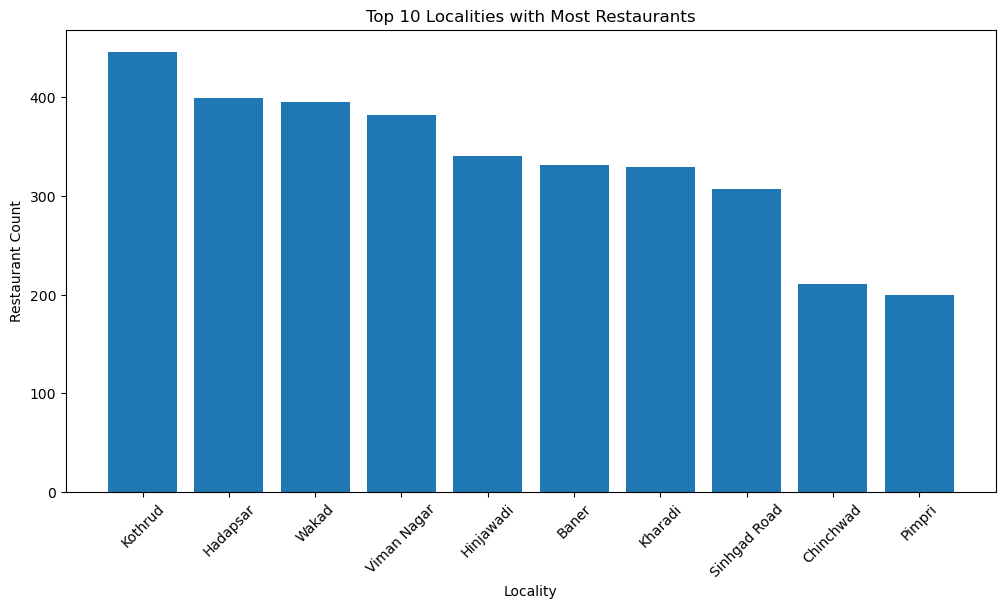

In [59]:

plt.figure(figsize=(12, 6))
plt.bar(top_localities, top_counts)
plt.xticks(rotation=45)
plt.xlabel('Locality')
plt.ylabel('Restaurant Count')
plt.title('Top 10 Localities with Most Restaurants')
plt.show()


Here, **Hadapsar** Has Most Restaurants

In [60]:
# Group by 'Locality' and calculate average ratings
average_ratings = zp.groupby('Locality')['Ratings_out_of_5'].mean()

# Convert the result to a DataFrame for better visualization
average_ratings_df = pd.DataFrame(average_ratings).reset_index()

# Print the average ratings for each city
print(average_ratings_df)


                 Locality  Ratings_out_of_5
0                  Akurdi          3.223077
1             Around Pune          3.900000
2                   Aundh          3.086982
3        B.T. Kawade Road          3.243750
4                Balewadi          2.814286
..                    ...               ...
94                  Wakad          2.944304
95               Wanowrie          3.241176
96  Wanowrie Kondhwa Area          2.404878
97                  Warje          2.866102
98               Yerawada          2.791667

[99 rows x 2 columns]


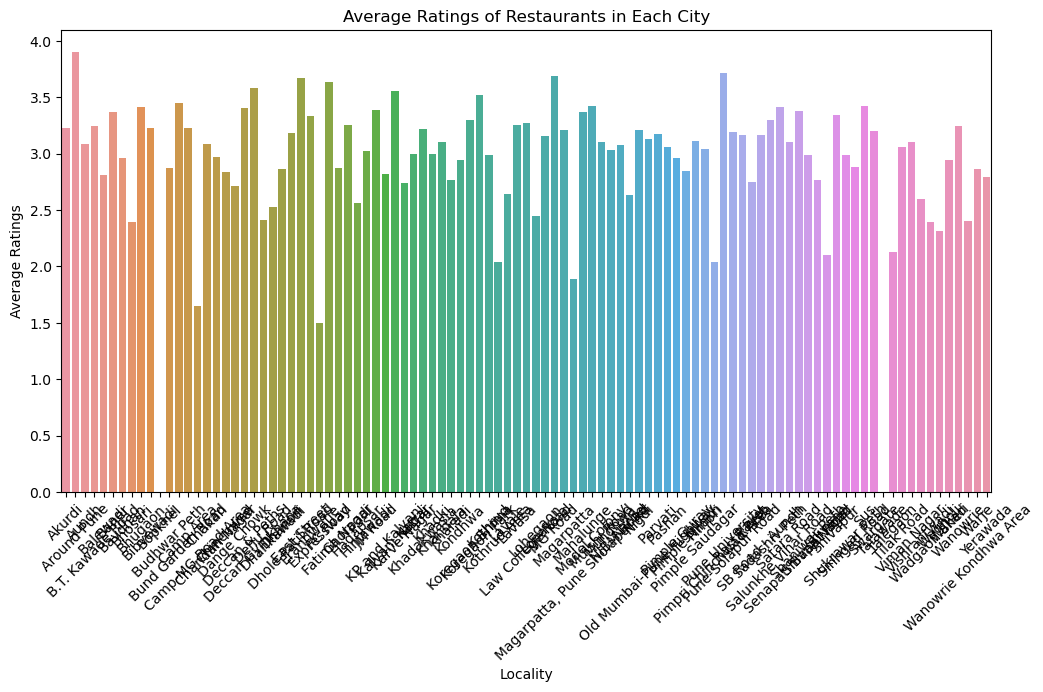

In [61]:
# Group by 'Locality' and calculate average ratings
average_ratings = zp.groupby('Locality')['Ratings_out_of_5'].mean()

# Convert the result to a DataFrame for better visualization
average_ratings_df = pd.DataFrame(average_ratings).reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar plot using Seaborn
sns.barplot(data=average_ratings_df, x='Locality', y='Ratings_out_of_5')
plt.xticks(rotation=45)
plt.xlabel('Locality')
plt.ylabel('Average Ratings')
plt.title('Average Ratings of Restaurants in Each City')

# Display the plot
plt.show()


### Sponsored Vs Ratings_out_of_5:

C:\Users\prath\AppData\Local\Temp\ipykernel_32332\1122738914.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, y='Sponsored', x='Ratings_out_of_5', ci=None, orient='h')


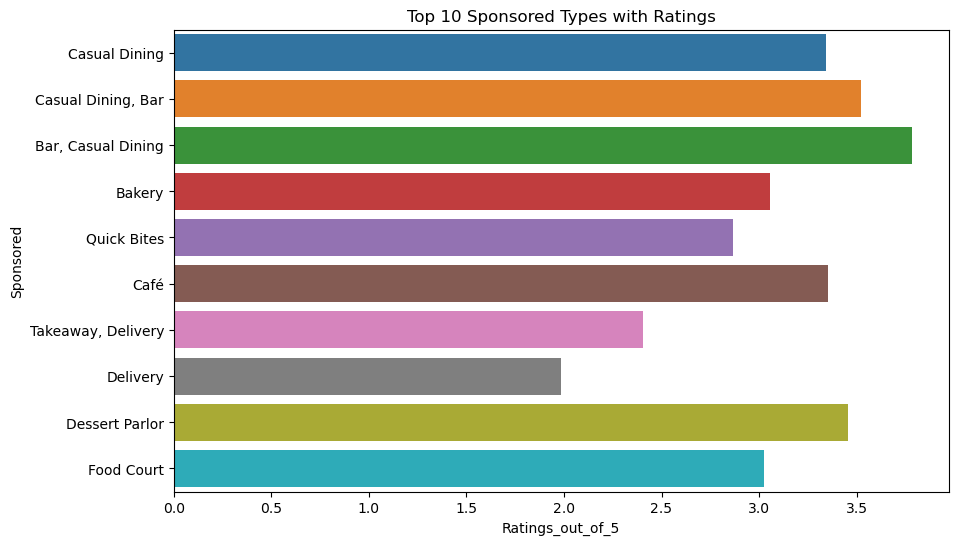

In [62]:
# Filter the DataFrame to include only the top 10 values in the 'Sponsored' column
top_10_sponsored = zp['Sponsored'].value_counts().nlargest(10).index

# Filter the DataFrame based on the top 10 sponsored values
filtered_data = zp[zp['Sponsored'].isin(top_10_sponsored)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the horizontal bar plot using Seaborn
sns.barplot(data=filtered_data, y='Sponsored', x='Ratings_out_of_5', ci=None, orient='h')

# Set the labels and title
plt.xlabel('Ratings_out_of_5')
plt.ylabel('Sponsored')
plt.title('Top 10 Sponsored Types with Ratings')

# Display the plot
plt.show()


 **As we can see, " Bar,Casual Dining" Sponsored has more ratings**

### Number of votes VS Ratings_out_of_5 : 

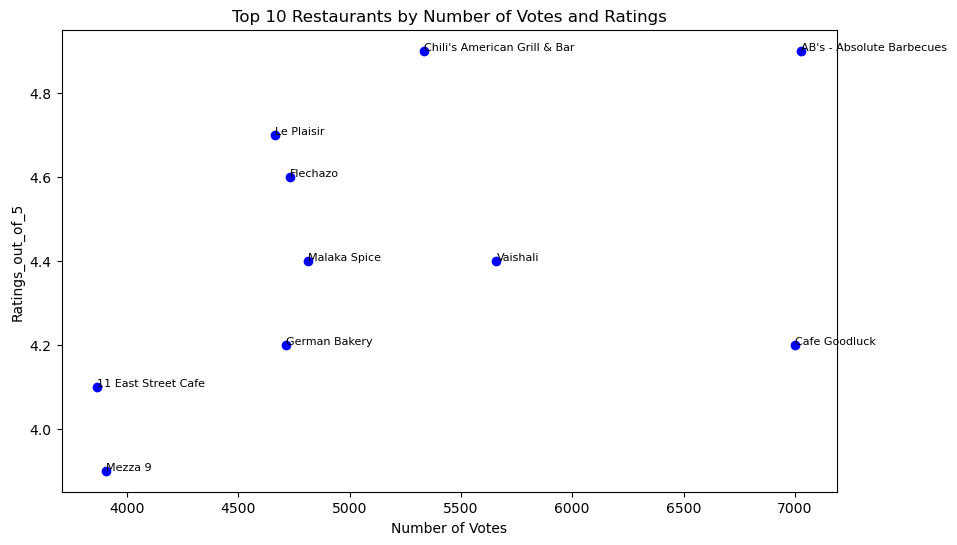

In [63]:
# Get the top 10 values based on 'Number of votes'
top_10_votes = zp.nlargest(10, 'Number of votes')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the scatter plot
plt.scatter(top_10_votes['Number of votes'], top_10_votes['Ratings_out_of_5'], color='blue')

# Set the labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Ratings_out_of_5')
plt.title('Top 10 Restaurants by Number of Votes and Ratings')

# Add labels for each point
for i, row in top_10_votes.iterrows():
    plt.annotate(row['Restaurant_Name'], (row['Number of votes'], row['Ratings_out_of_5']), fontsize=8)

# Display the plot
plt.show()


#### Here we have "AB's- Absolute Barbecues"  Restaurant which has more number of votes with Good Ratings

### Cuisines  VS  Ratings_out_of_5 :

C:\Users\prath\AppData\Local\Temp\ipykernel_32332\234327882.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=filtered_df, x='Ratings_out_of_5', y='Cuisines', ci=None)


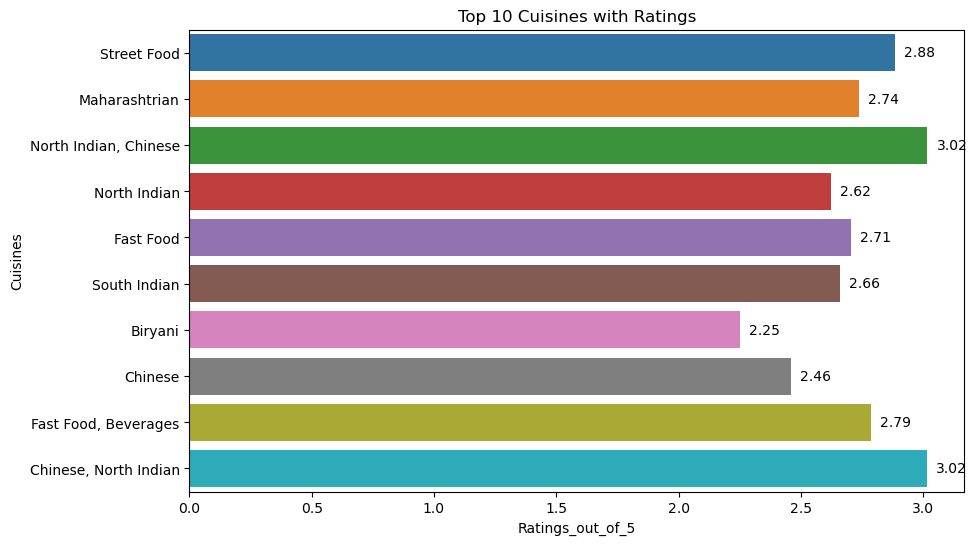

In [64]:
# Get the top 10 values based on 'Cuisines' column
top_10_cuisines = zp['Cuisines'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 cuisines
filtered_df = zp[zp['Cuisines'].isin(top_10_cuisines.index)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using Seaborn and Matplotlib
ax = sns.barplot(data=filtered_df, x='Ratings_out_of_5', y='Cuisines', ci=None)

# Set the labels and title
plt.xlabel('Ratings_out_of_5')
plt.ylabel('Cuisines')
plt.title('Top 10 Cuisines with Ratings')

# Add value annotations above each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='center', va='center')

# Display the plot
plt.show()


#### Here, _"Chinese,North Indian"_ Cuisines have more ratings 

C:\Users\prath\AppData\Local\Temp\ipykernel_32332\2259385693.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=filtered_df, x='Ratings_out_of_5', y='Locality', ci=None)


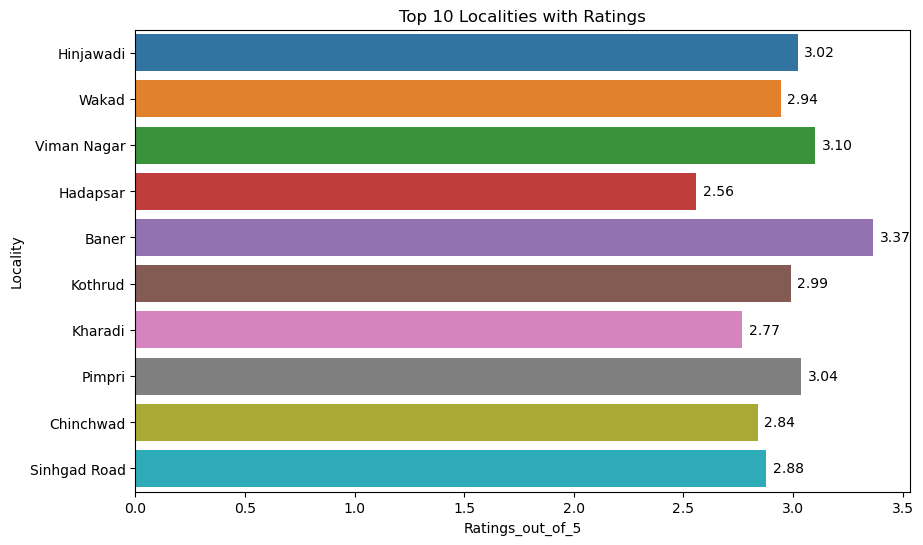

In [65]:
# Get the top 10 values based on 'Locality' column
top_10_localities = zp['Locality'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 localities
filtered_df = zp[zp['Locality'].isin(top_10_localities.index)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot using Seaborn and Matplotlib
ax = sns.barplot(data=filtered_df, x='Ratings_out_of_5', y='Locality', ci=None)

# Set the labels and title
plt.xlabel('Ratings_out_of_5')
plt.ylabel('Locality')
plt.title('Top 10 Localities with Ratings')

# Add value annotations above each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='center', va='center')

# Display the plot
plt.show()


   ####  Locality: "Baner" Has Most Ratings

### Charges_for_two VS Ratings_out_of_5

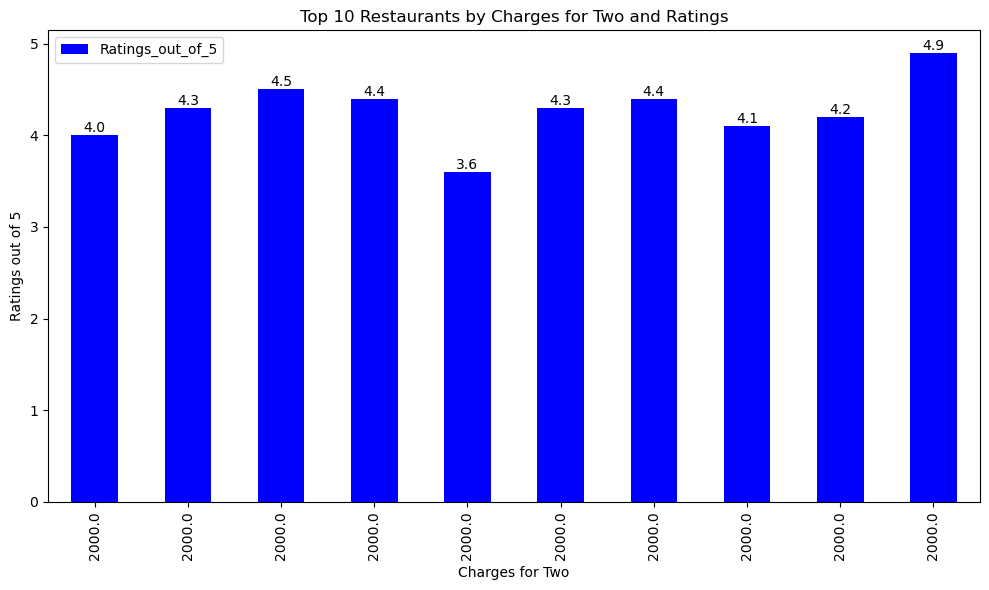

In [66]:
# Sort the DataFrame by the "Charges_for_two" column in descending order and take the top 10 rows
top_10_zp = zp.nlargest(10, "Charges_for_two")

# Extract the necessary columns
charges_for_two = top_10_zp["Charges_for_two"]
ratings_out_of_5 = top_10_zp["Ratings_out_of_5"]

# Plot the graph
ax = top_10_zp.plot(x="Charges_for_two", y="Ratings_out_of_5", kind="bar", color="blue", figsize=(10, 6))

# Add labels and title
ax.set_xlabel("Charges for Two")
ax.set_ylabel("Ratings out of 5")
ax.set_title("Top 10 Restaurants by Charges for Two and Ratings")

# Display the values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


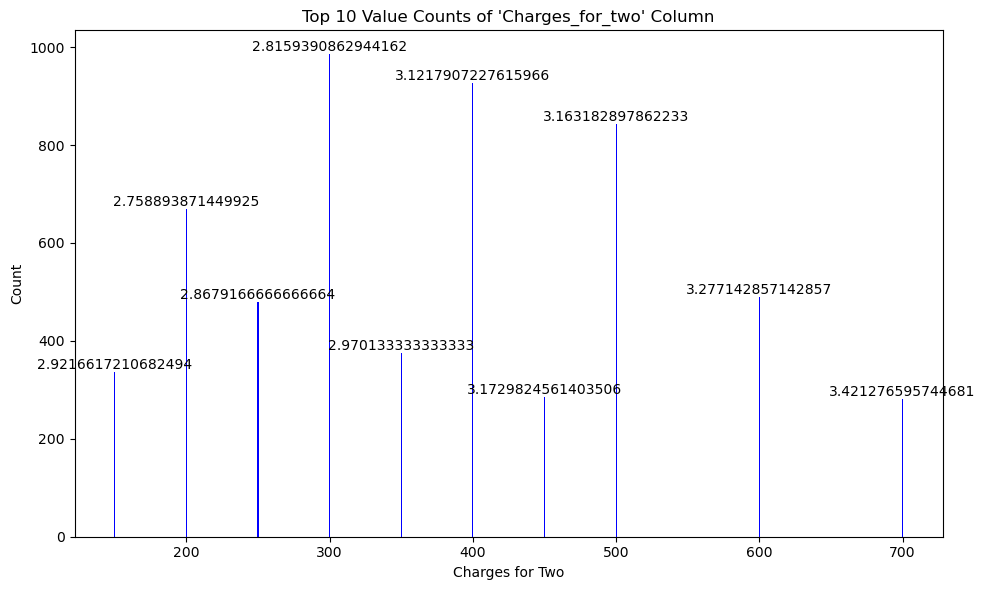

In [67]:
# Get the top 10 value counts of 'Charges_for_two' column
top_10_counts = zp['Charges_for_two'].value_counts().head(10)

# Get the corresponding 'Ratings_out_of_5' values for the top 10 counts
top_10_ratings = zp.groupby('Charges_for_two')['Ratings_out_of_5'].mean().loc[top_10_counts.index]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the graph
ax.bar(top_10_counts.index, top_10_counts.values, color="blue")

# Add labels and title
ax.set_xlabel("Charges for Two")
ax.set_ylabel("Count")
ax.set_title("Top 10 Value Counts of 'Charges_for_two' Column")

# Display the 'Ratings_out_of_5' values on top of each bar
for i, v in enumerate(top_10_counts.values):
    ax.text(top_10_counts.index[i], v, str(top_10_ratings[top_10_counts.index[i]]), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


### payment_modes VS Ratings_out_of_5 :

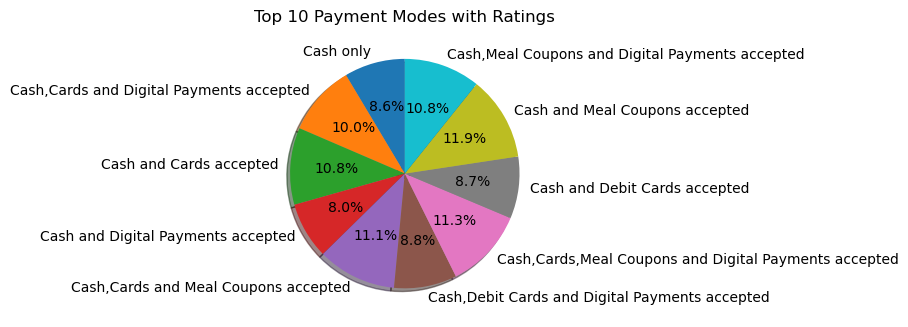

In [68]:
# Get the top 10 payment modes and their average ratings
top_10_modes = zp['payment_modes'].value_counts().head(10).index
top_10_ratings = zp.groupby('payment_modes')['Ratings_out_of_5'].mean().loc[top_10_modes]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the pie chart
ax.pie(top_10_ratings, labels=top_10_modes, autopct='%1.1f%%', startangle=90, shadow=True)

# Add title
ax.set_title("Top 10 Payment Modes with Ratings")

# Show the plot
plt.tight_layout()
plt.show()


#### Here , Payment_ Modes: Cash and Meal Coupons has more Ratings

### Wine and Beer With Ratings_out_of_5 :

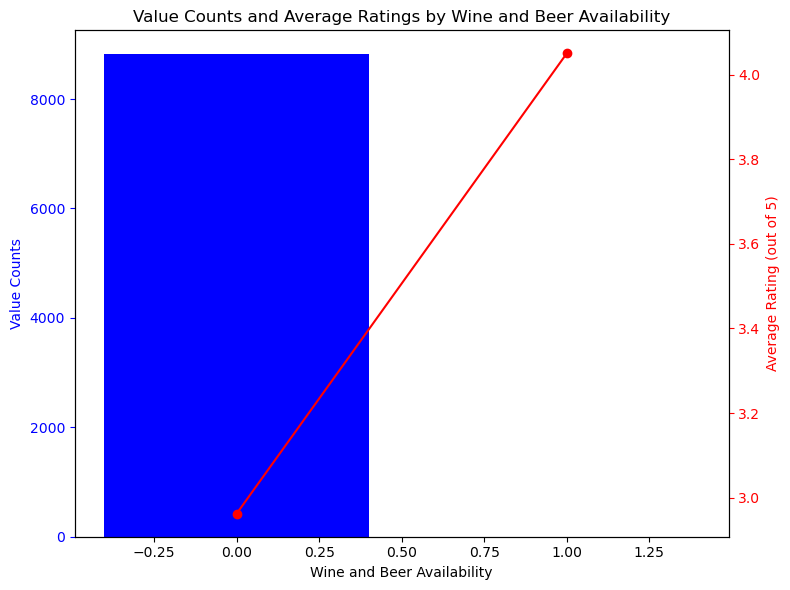

In [69]:
# Get the value counts of the "Seaside" column
value_counts = zp['Wine and Beer'].value_counts()

# Calculate the average ratings for each category of seaside availability
average_ratings = zp.groupby('Wine and Beer')['Ratings_out_of_5'].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the value counts on the first y-axis
ax1.bar(value_counts.index, value_counts, color='blue')
ax1.set_ylabel("Value Counts", color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the average ratings
ax2 = ax1.twinx()
ax2.plot(value_counts.index, average_ratings, marker='o', color='red')
ax2.set_ylabel("Average Rating (out of 5)", color='red')
ax2.tick_params('y', colors='red')

# Add labels and title
ax1.set_xlabel("Wine and Beer Availability")
ax1.set_title("Value Counts and Average Ratings by Wine and Beer Availability")

# Show the plot
plt.tight_layout()
plt.show()

In [70]:
zp['Wine and Beer'].value_counts()

0    8815
1       2
Name: Wine and Beer, dtype: int64

####  Here , If Wine and Beer Not Available then Ratings are "High"

### Dance Floor With Ratings_out_of_5

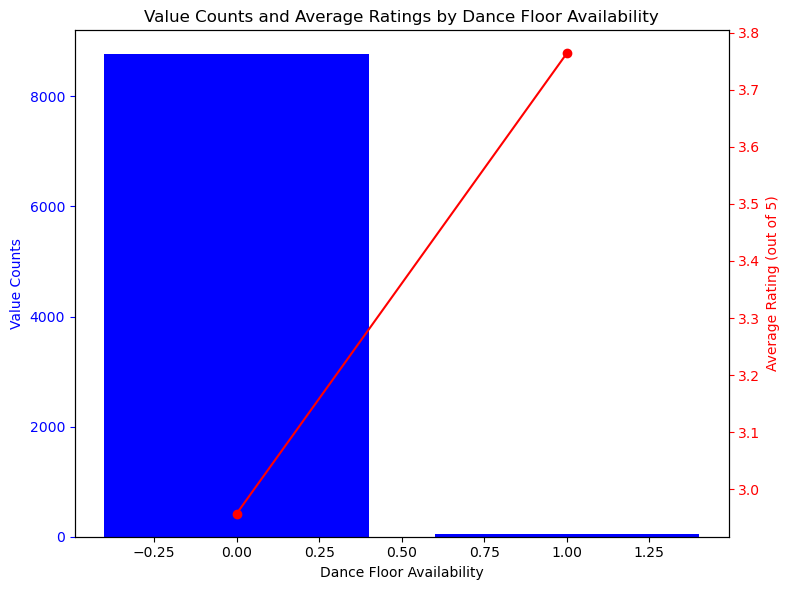

In [71]:
# Get the value counts of the "Seaside" column
value_counts = zp['Dance Floor'].value_counts()

# Calculate the average ratings for each category of seaside availability
average_ratings = zp.groupby('Dance Floor')['Ratings_out_of_5'].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the value counts on the first y-axis
ax1.bar(value_counts.index, value_counts, color='blue')
ax1.set_ylabel("Value Counts", color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the average ratings
ax2 = ax1.twinx()
ax2.plot(value_counts.index, average_ratings, marker='o', color='red')
ax2.set_ylabel("Average Rating (out of 5)", color='red')
ax2.tick_params('y', colors='red')

# Add labels and title
ax1.set_xlabel("Dance Floor Availability")
ax1.set_title("Value Counts and Average Ratings by Dance Floor Availability")

# Show the plot
plt.tight_layout()
plt.show()

In [72]:
zp['Dance Floor'].value_counts()

0    8762
1      55
Name: Dance Floor, dtype: int64

#### Here , If Dance Floor Not Available then Ratings are  "High"

### Lunch Menu with Ratings_out_of_5

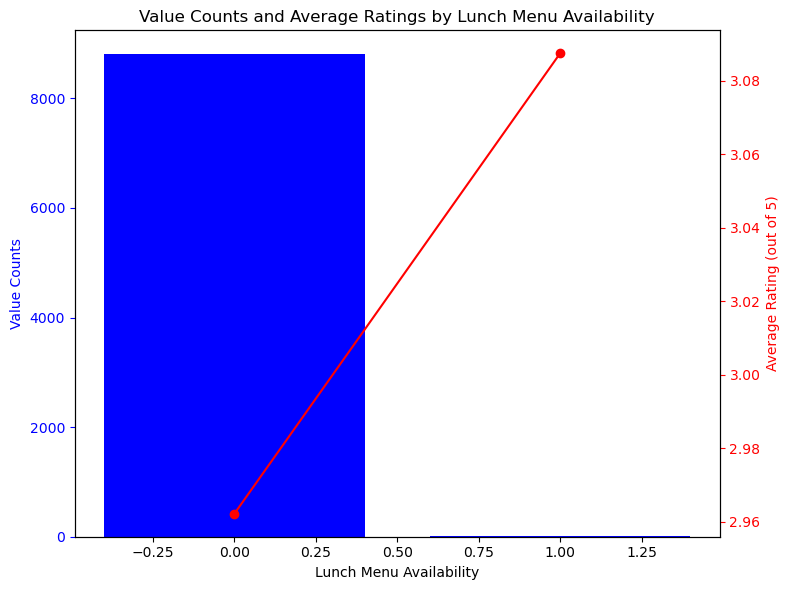

In [73]:
# Get the value counts of the "Seaside" column
value_counts = zp['Lunch Menu'].value_counts()

# Calculate the average ratings for each category of seaside availability
average_ratings = zp.groupby('Lunch Menu')['Ratings_out_of_5'].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the value counts on the first y-axis
ax1.bar(value_counts.index, value_counts, color='blue')
ax1.set_ylabel("Value Counts", color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the average ratings
ax2 = ax1.twinx()
ax2.plot(value_counts.index, average_ratings, marker='o', color='red')
ax2.set_ylabel("Average Rating (out of 5)", color='red')
ax2.tick_params('y', colors='red')

# Add labels and title
ax1.set_xlabel("Lunch Menu Availability")
ax1.set_title("Value Counts and Average Ratings by Lunch Menu Availability")

# Show the plot
plt.tight_layout()
plt.show()


In [74]:
zp['Lunch Menu'].value_counts()

0    8801
1      16
Name: Lunch Menu, dtype: int64

#### Ratings are high either Lunch Menu is Not Available

### Outdoor Seating with Ratings_out_of_5

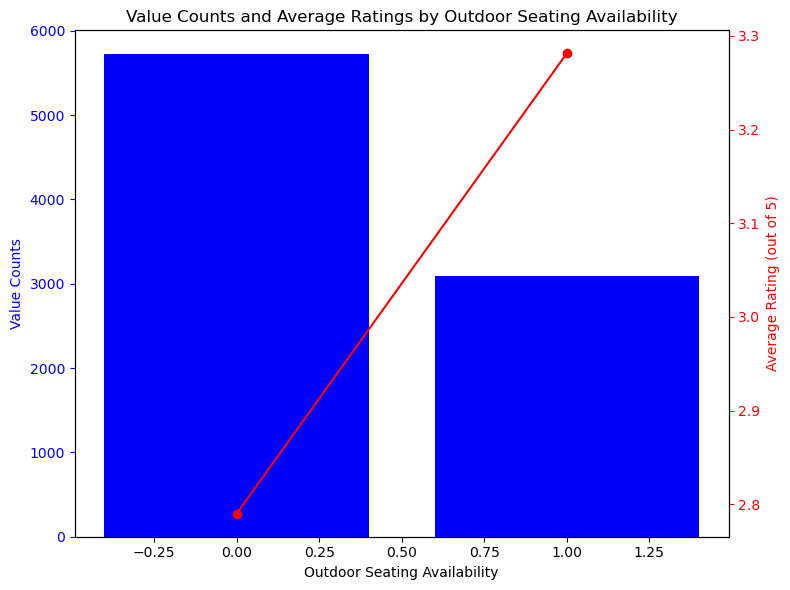

In [75]:
# Get the value counts of the "Seaside" column
value_counts = zp['Outdoor Seating'].value_counts()

# Calculate the average ratings for each category of seaside availability
average_ratings = zp.groupby('Outdoor Seating')['Ratings_out_of_5'].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the value counts on the first y-axis
ax1.bar(value_counts.index, value_counts, color='blue')
ax1.set_ylabel("Value Counts", color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the average ratings
ax2 = ax1.twinx()
ax2.plot(value_counts.index, average_ratings, marker='o', color='red')
ax2.set_ylabel("Average Rating (out of 5)", color='red')
ax2.tick_params('y', colors='red')

# Add labels and title
ax1.set_xlabel("Outdoor Seating Availability")
ax1.set_title("Value Counts and Average Ratings by Outdoor Seating Availability")

# Show the plot
plt.tight_layout()
plt.show()


In [76]:
zp['Outdoor Seating'].value_counts()

0    5720
1    3097
Name: Outdoor Seating, dtype: int64

#### Here , Outdoor Seating isnot  available then Ratings are "high"

### Seaside with Ratings_out_of_5

In [77]:
zp['Seaside'].value_counts()

0    8815
1       2
Name: Seaside, dtype: int64

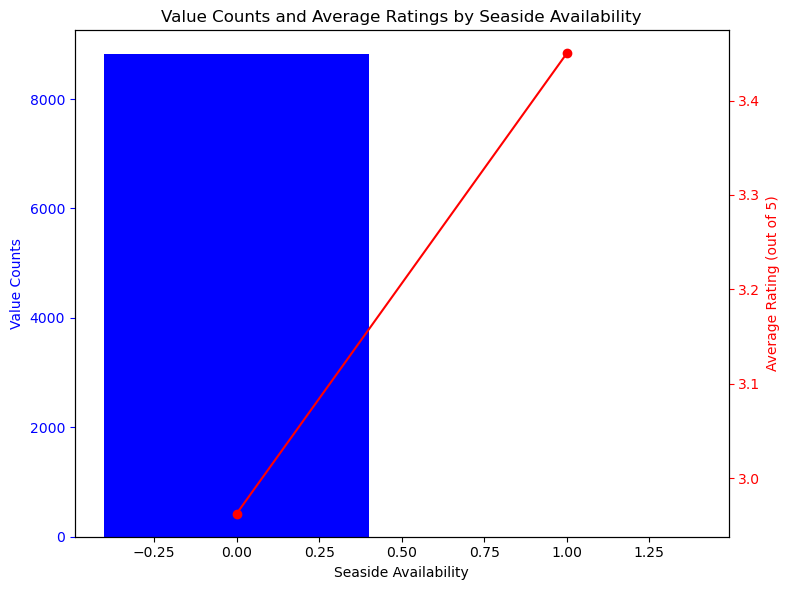

In [78]:
# Get the value counts of the "Seaside" column
value_counts = zp['Seaside'].value_counts()

# Calculate the average ratings for each category of seaside availability
average_ratings = zp.groupby('Seaside')['Ratings_out_of_5'].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the value counts on the first y-axis
ax1.bar(value_counts.index, value_counts, color='blue')
ax1.set_ylabel("Value Counts", color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the average ratings
ax2 = ax1.twinx()
ax2.plot(value_counts.index, average_ratings, marker='o', color='red')
ax2.set_ylabel("Average Rating (out of 5)", color='red')
ax2.tick_params('y', colors='red')

# Add labels and title
ax1.set_xlabel("Seaside Availability")
ax1.set_title("Value Counts and Average Ratings by Seaside Availability")

# Show the plot
plt.tight_layout()
plt.show()


#### Here, Seaside is Not Available then Ratings are "High"

### 4/5 Star with Ratings_out_of_5 :

In [79]:
zp['4/5 Star'].value_counts()

0    8807
1      10
Name: 4/5 Star, dtype: int64

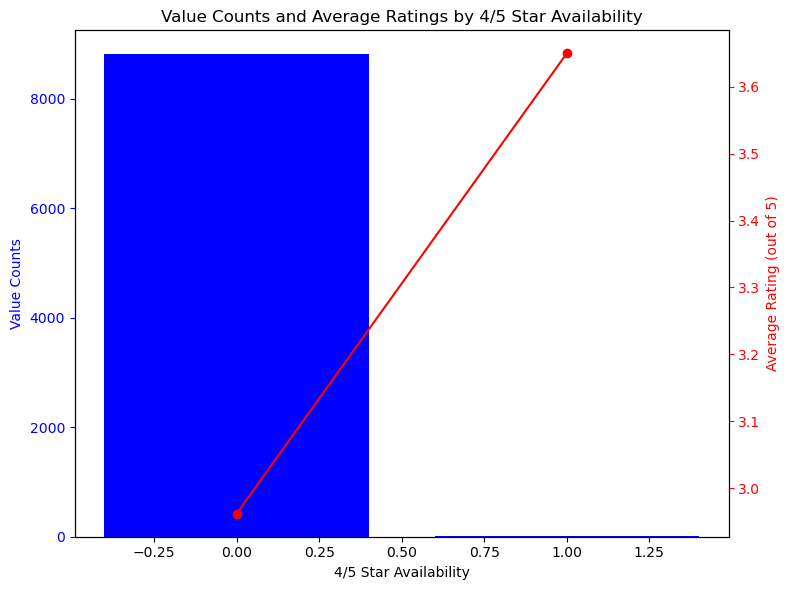

In [80]:
# Get the value counts of the "Seaside" column
value_counts = zp['4/5 Star'].value_counts()

# Calculate the average ratings for each category of seaside availability
average_ratings = zp.groupby('4/5 Star')['Ratings_out_of_5'].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the value counts on the first y-axis
ax1.bar(value_counts.index, value_counts, color='blue')
ax1.set_ylabel("Value Counts", color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the average ratings
ax2 = ax1.twinx()
ax2.plot(value_counts.index, average_ratings, marker='o', color='red')
ax2.set_ylabel("Average Rating (out of 5)", color='red')
ax2.tick_params('y', colors='red')

# Add labels and title
ax1.set_xlabel("4/5 Star Availability")
ax1.set_title("Value Counts and Average Ratings by 4/5 Star Availability")

# Show the plot
plt.tight_layout()
plt.show()


#### Here, 4/5 Star is Not Available then Ratings are High

### Free Parking with Ratings_out_of_5

In [81]:
zp['Free Parking'].value_counts()

0    7558
1    1259
Name: Free Parking, dtype: int64

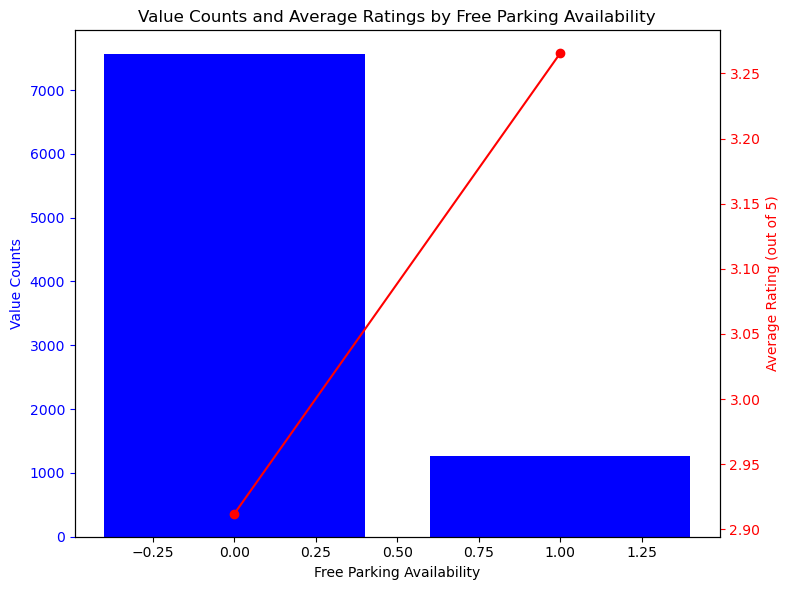

In [82]:
# Get the value counts of the "Seaside" column
value_counts = zp['Free Parking'].value_counts()

# Calculate the average ratings for each category of seaside availability
average_ratings = zp.groupby('Free Parking')['Ratings_out_of_5'].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the value counts on the first y-axis
ax1.bar(value_counts.index, value_counts, color='blue')
ax1.set_ylabel("Value Counts", color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the average ratings
ax2 = ax1.twinx()
ax2.plot(value_counts.index, average_ratings, marker='o', color='red')
ax2.set_ylabel("Average Rating (out of 5)", color='red')
ax2.tick_params('y', colors='red')

# Add labels and title
ax1.set_xlabel("Free Parking Availability")
ax1.set_title("Value Counts and Average Ratings by Free Parking Availability")

# Show the plot
plt.tight_layout()
plt.show()


#### Here , Free Parking is Not Available Then Ratings are "high"

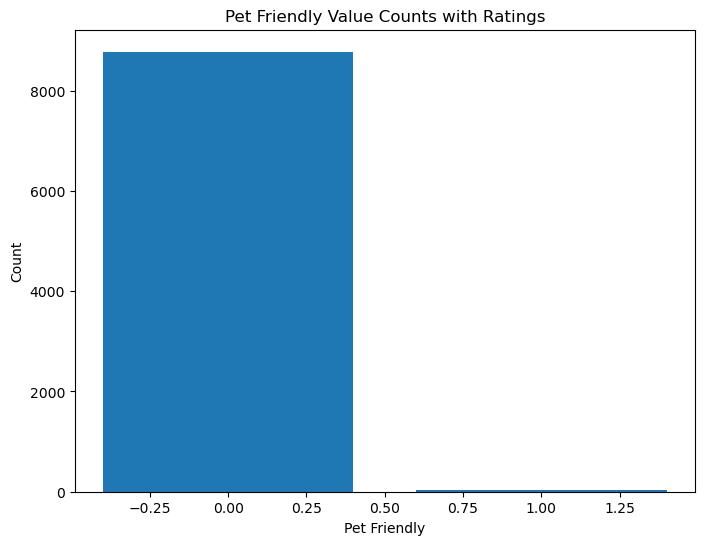

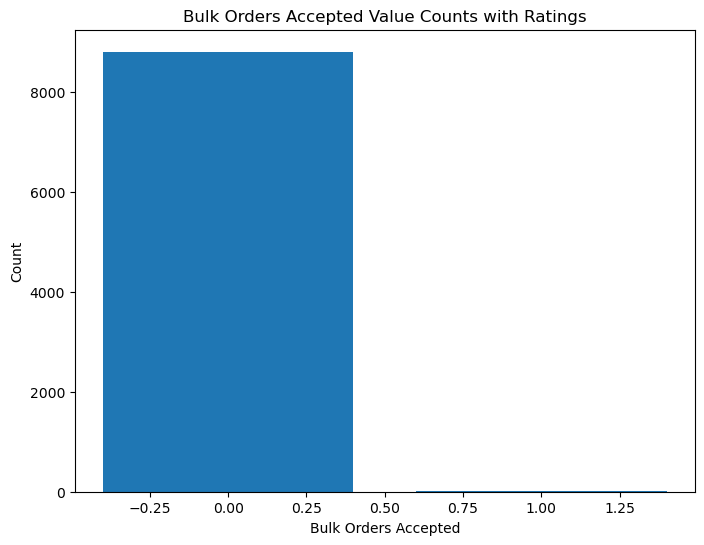

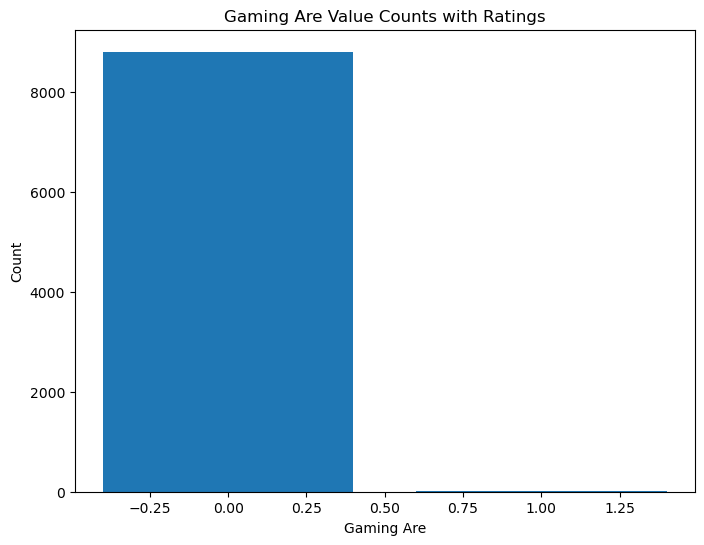

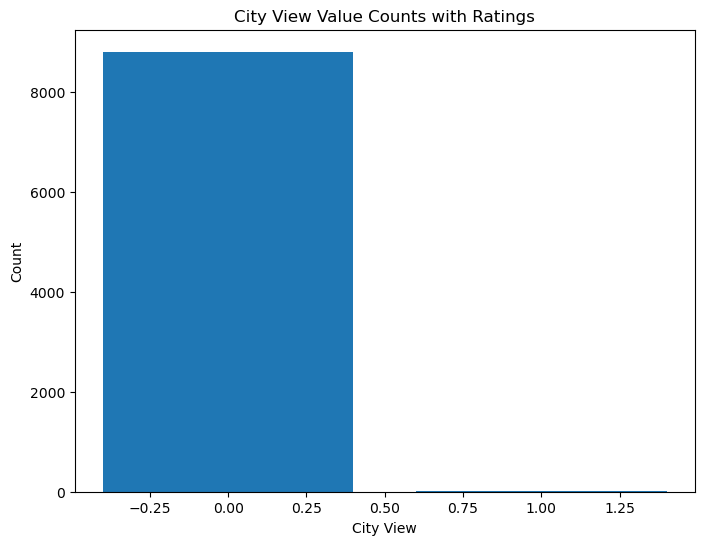

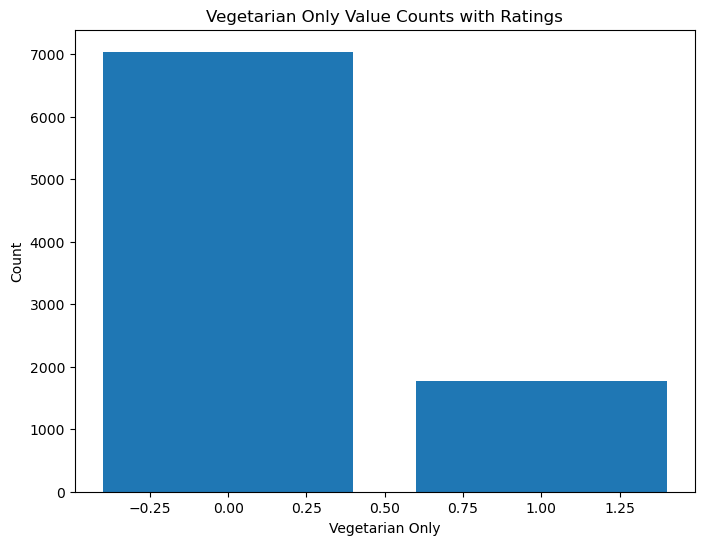

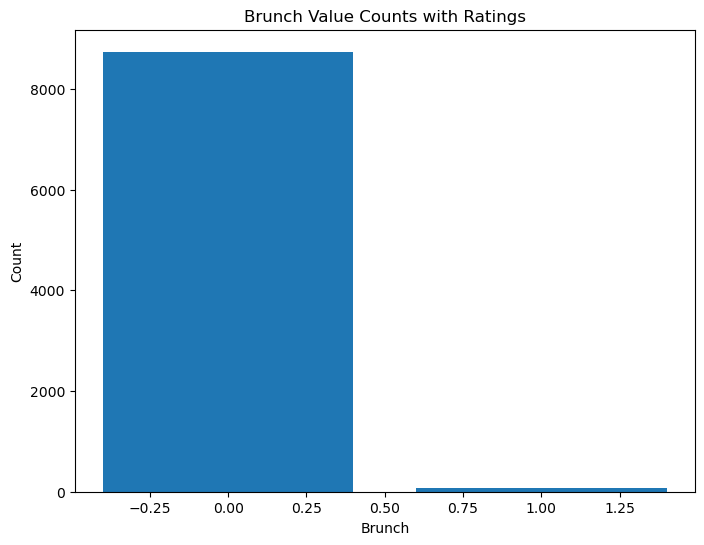

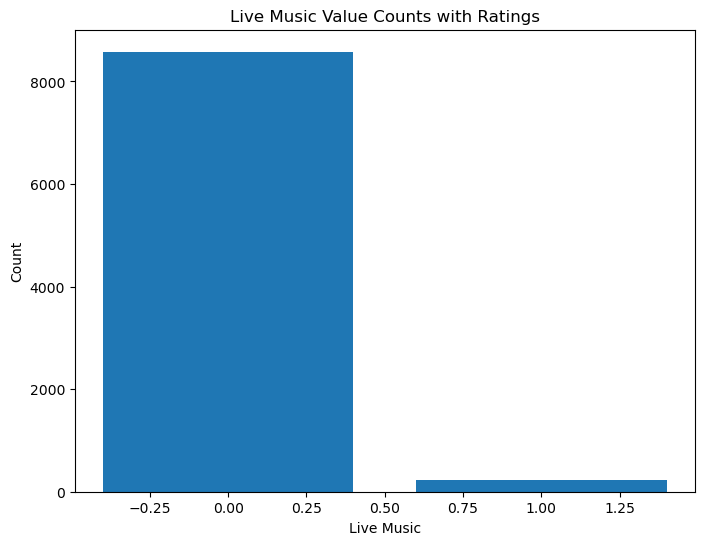

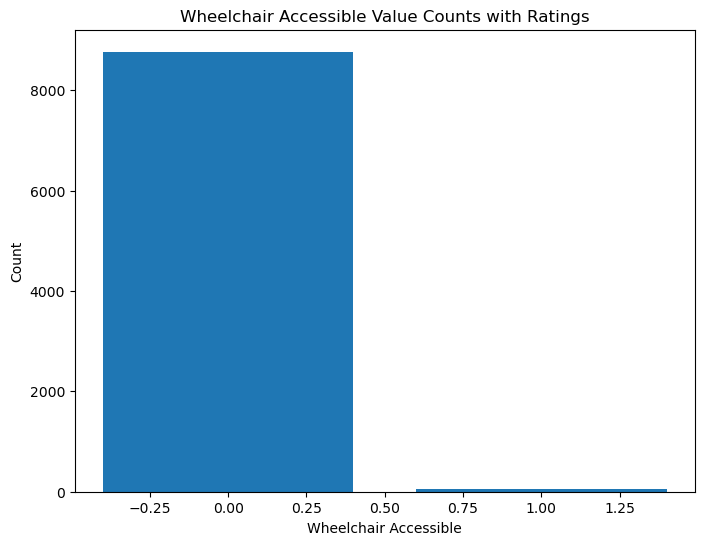

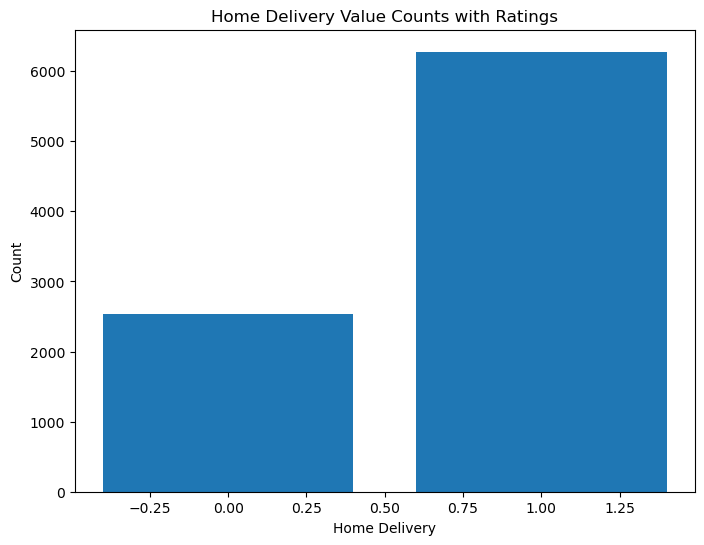

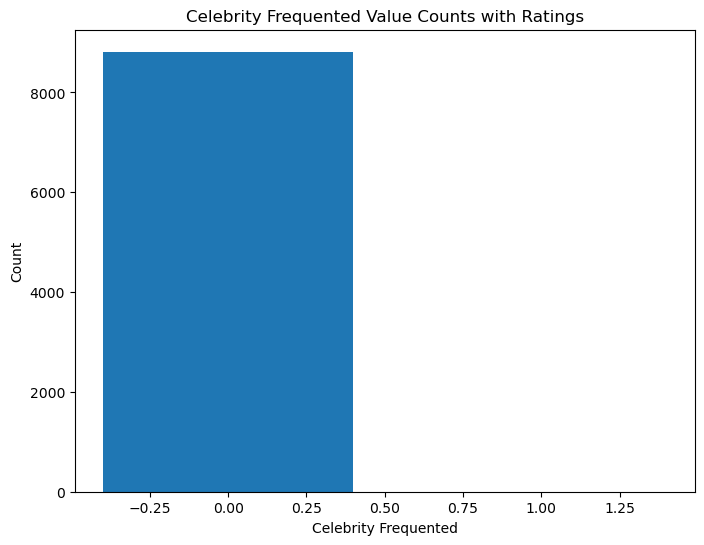

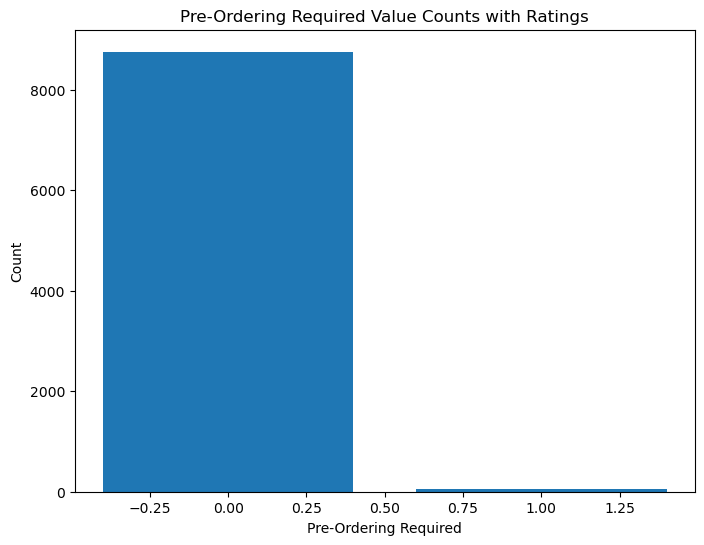

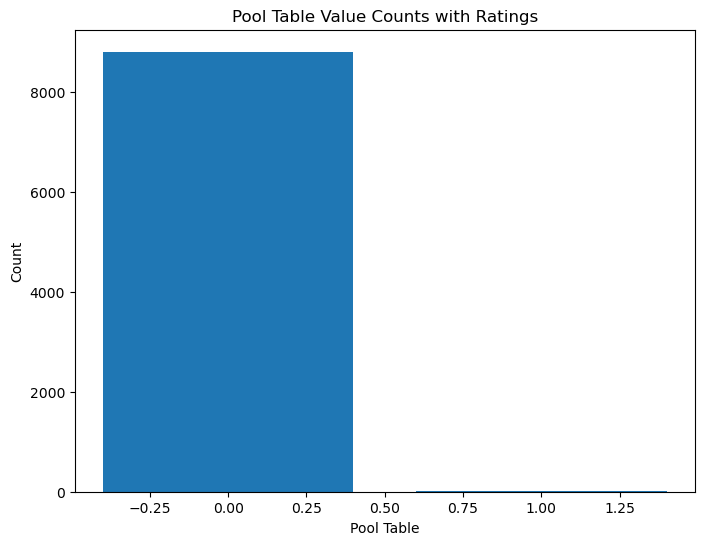

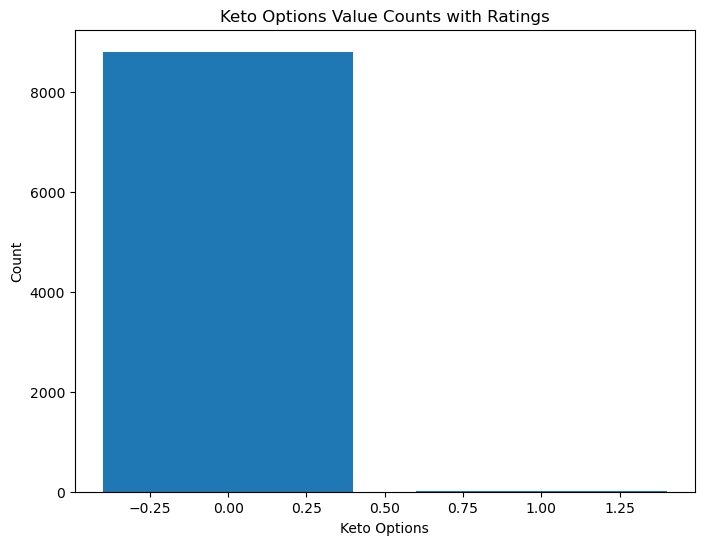

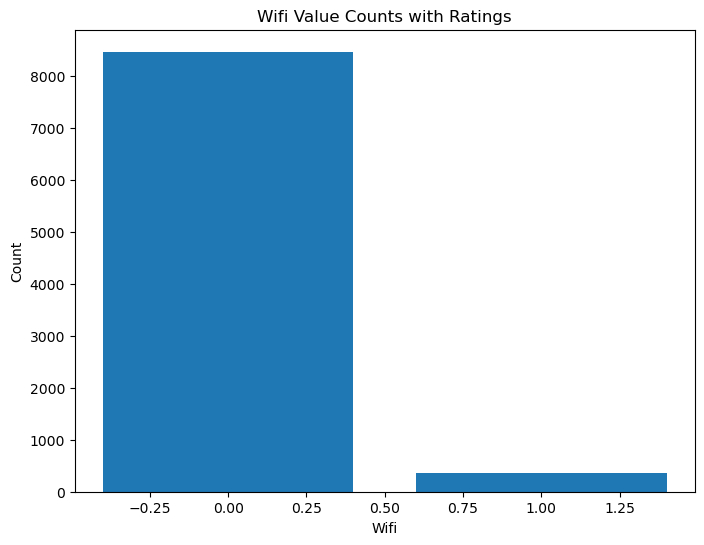

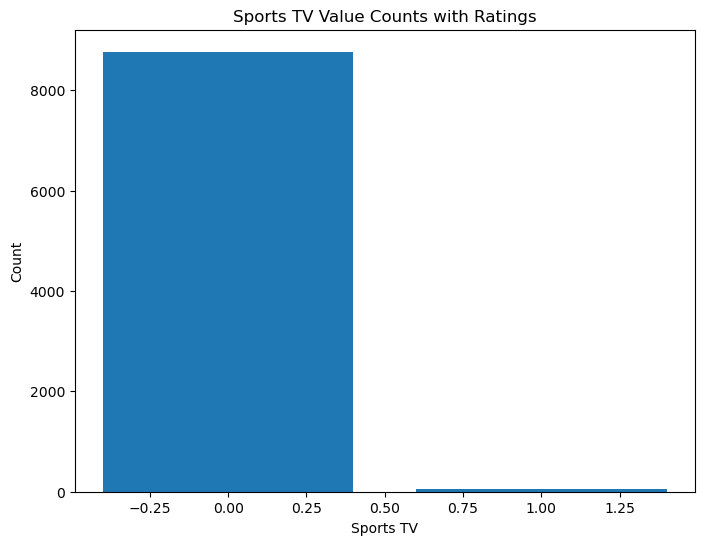

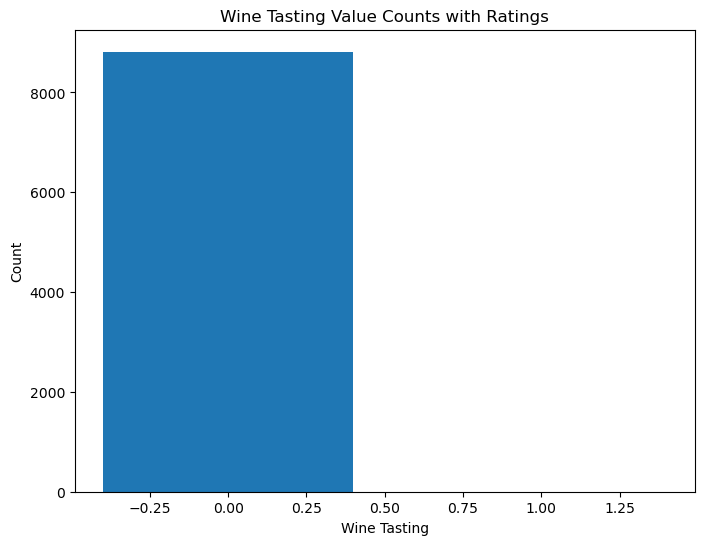

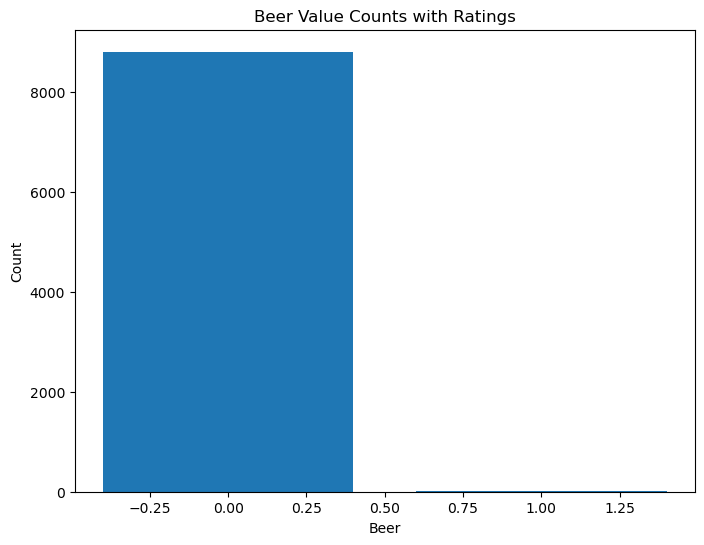

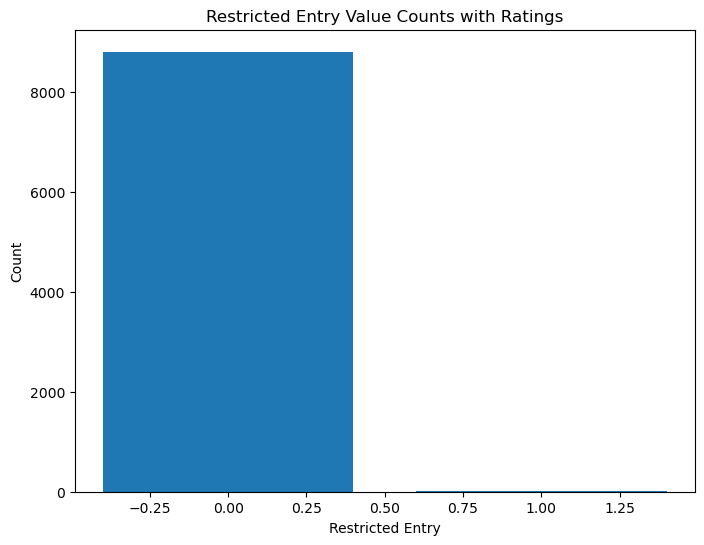

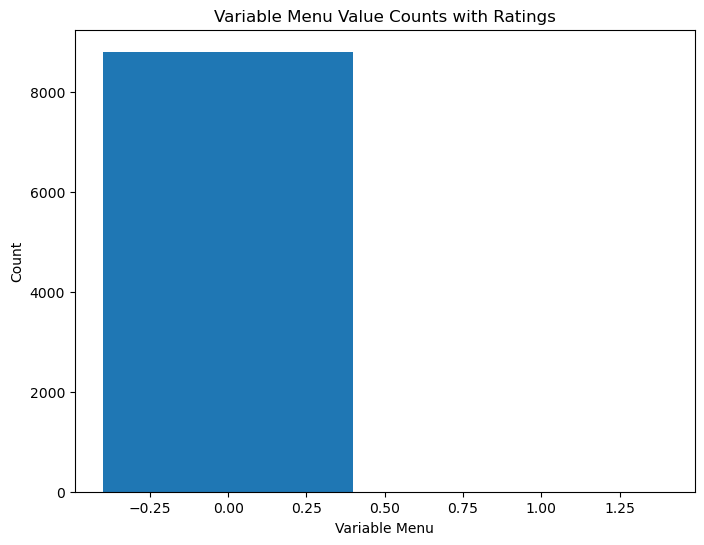

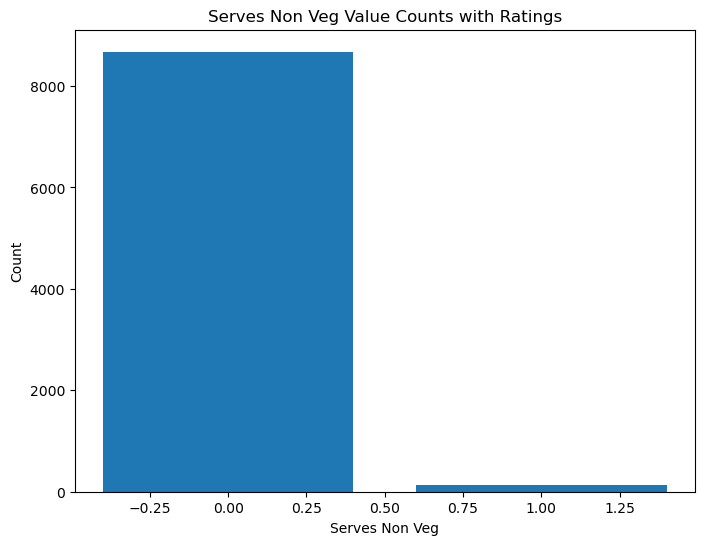

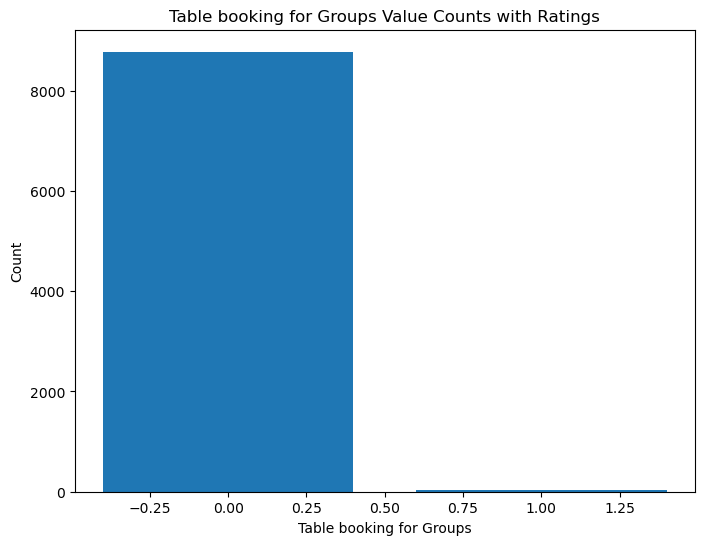

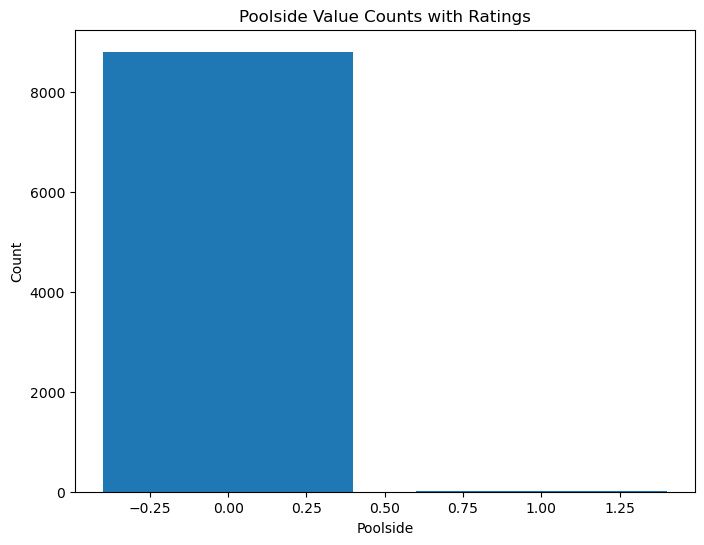

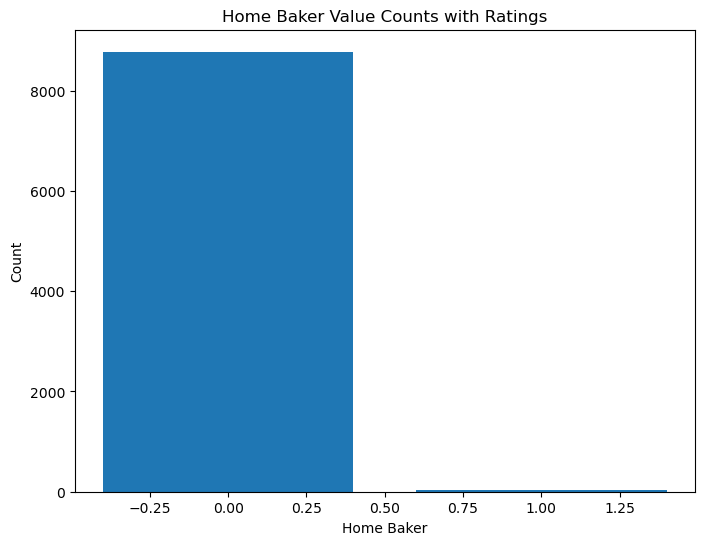

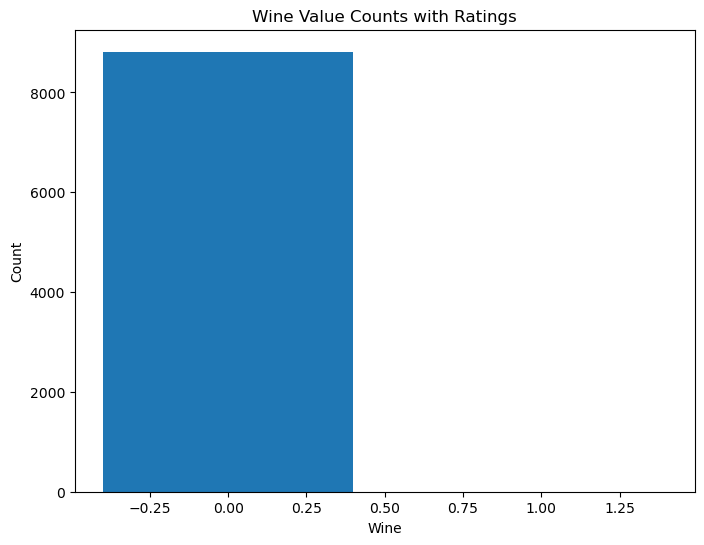

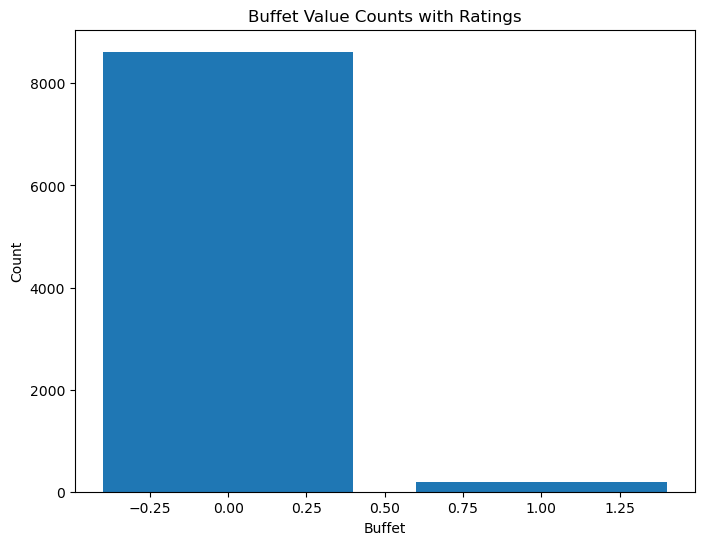

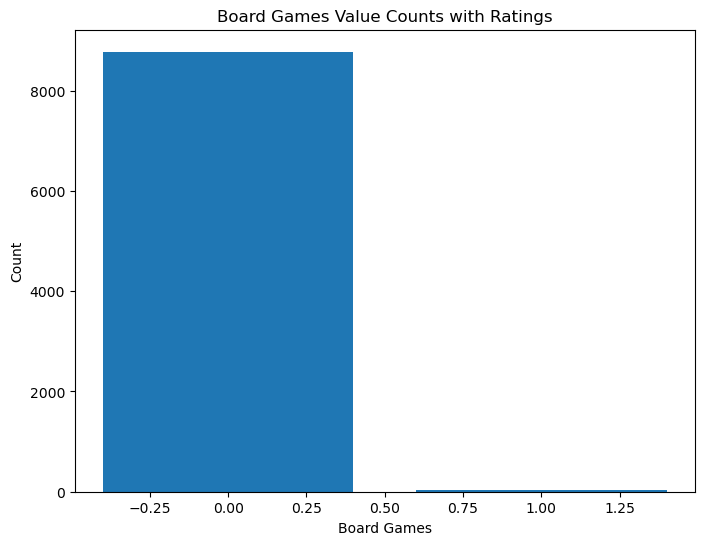

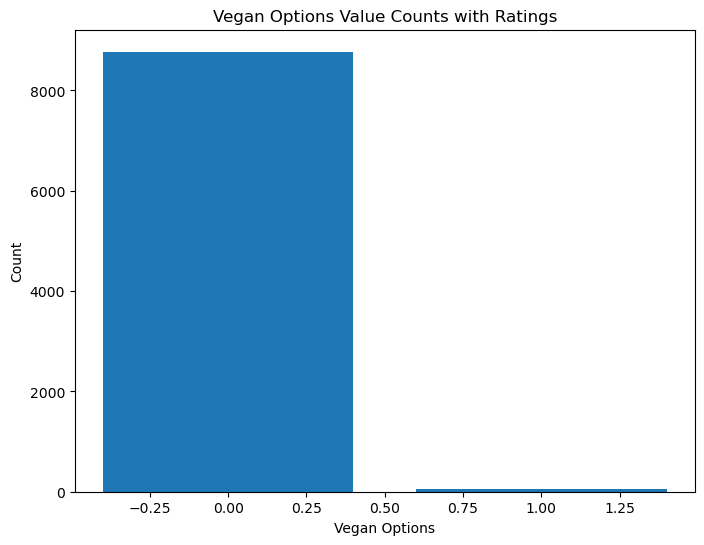

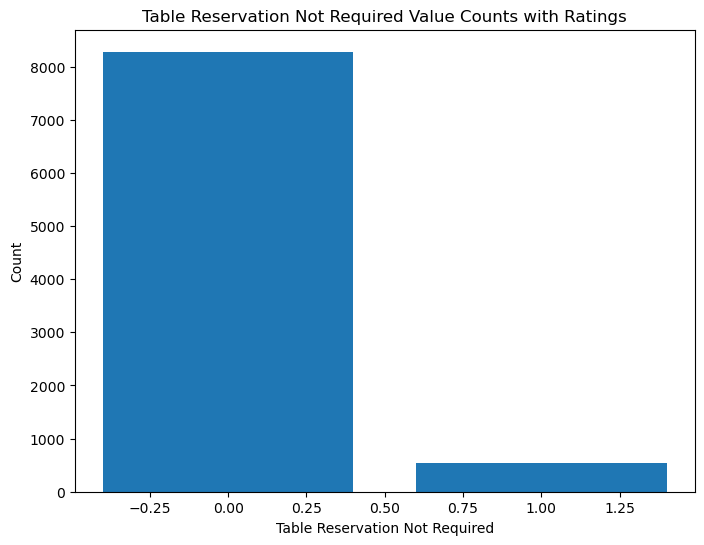

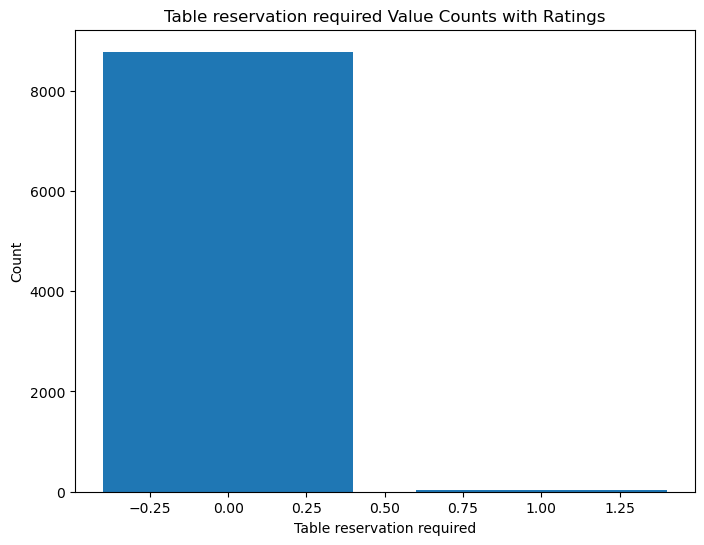

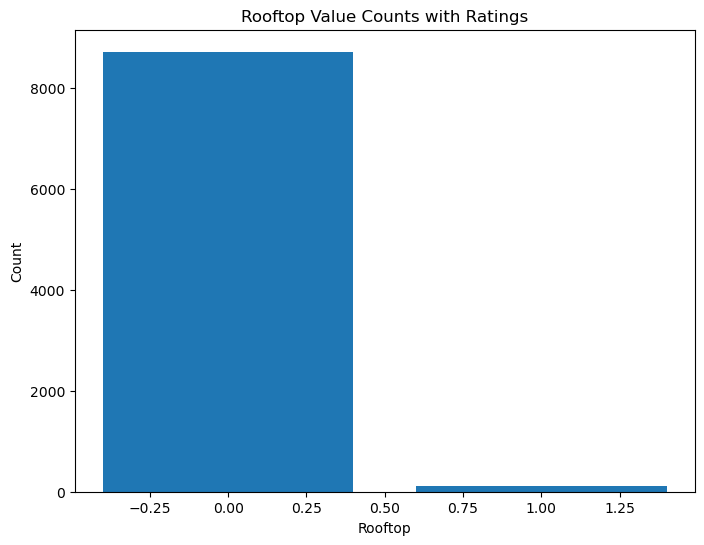

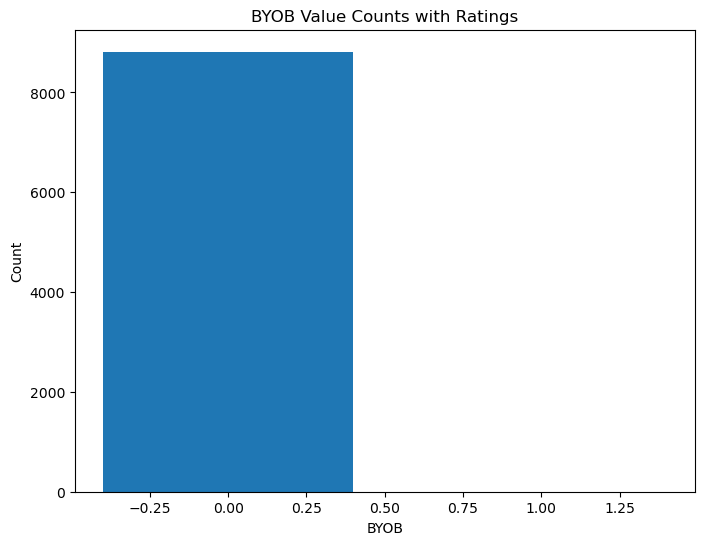

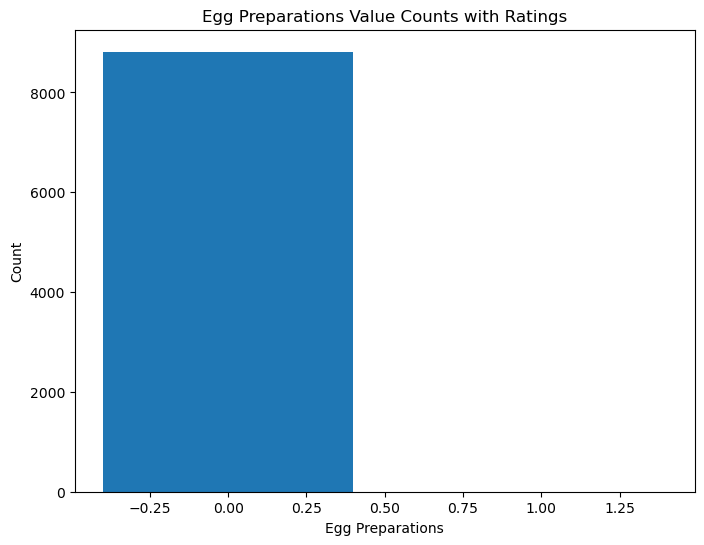

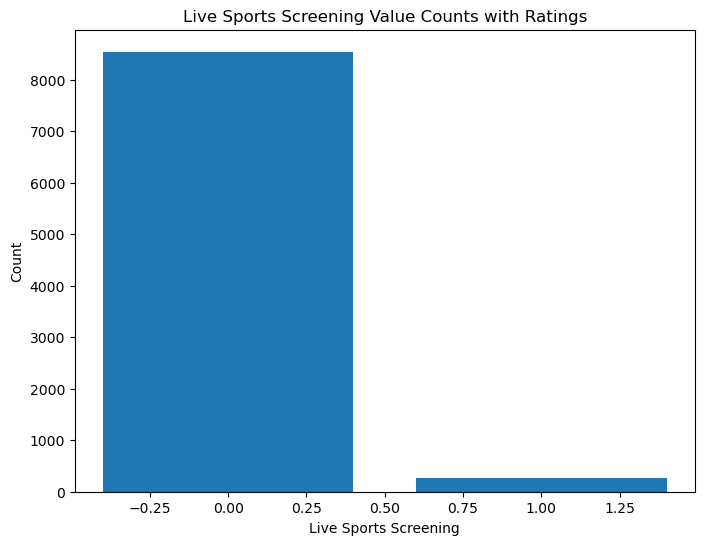

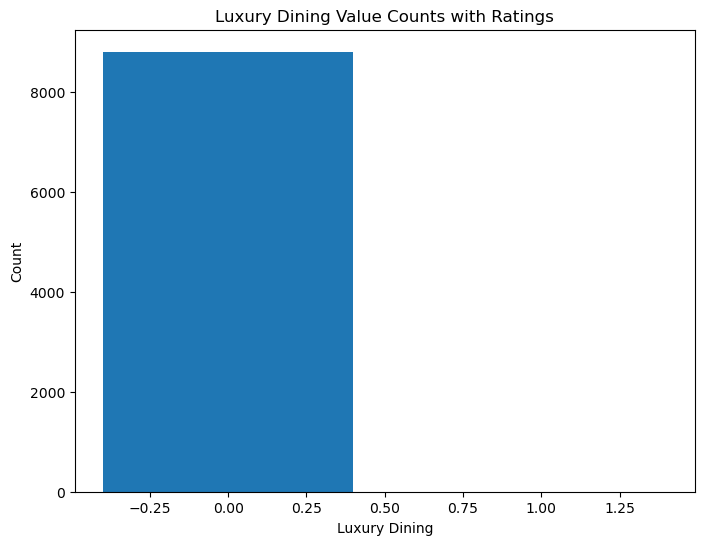

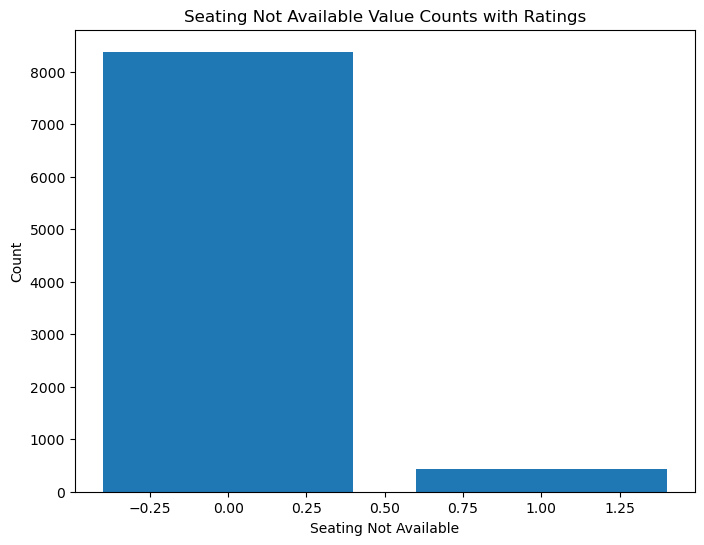

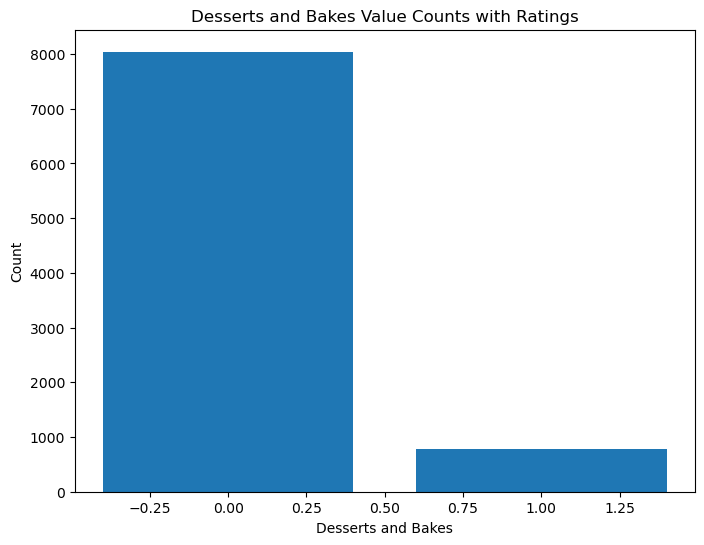

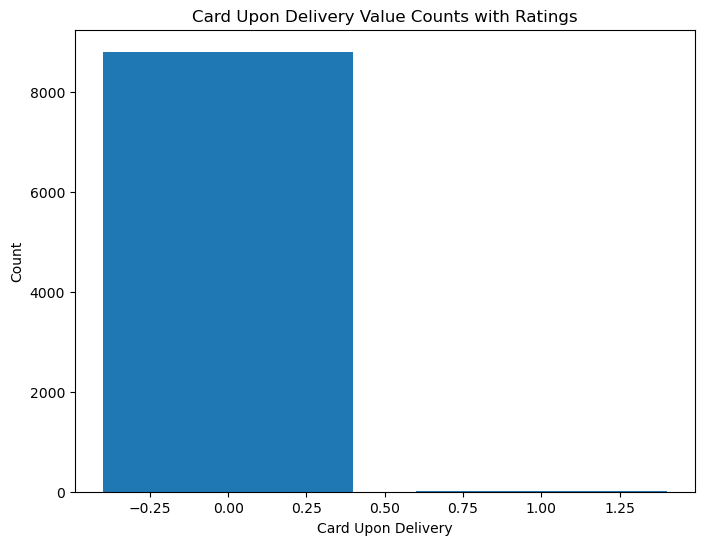

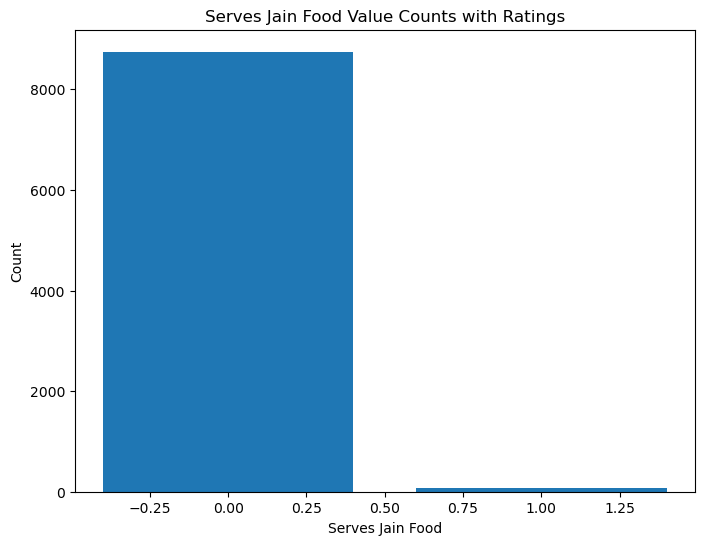

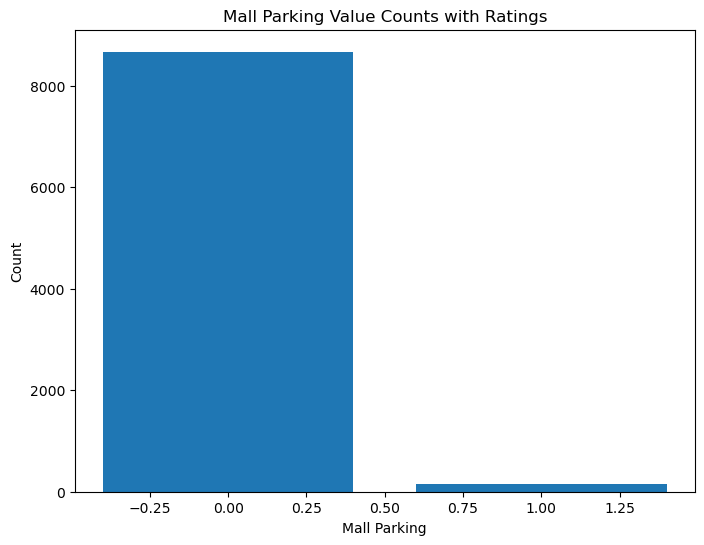

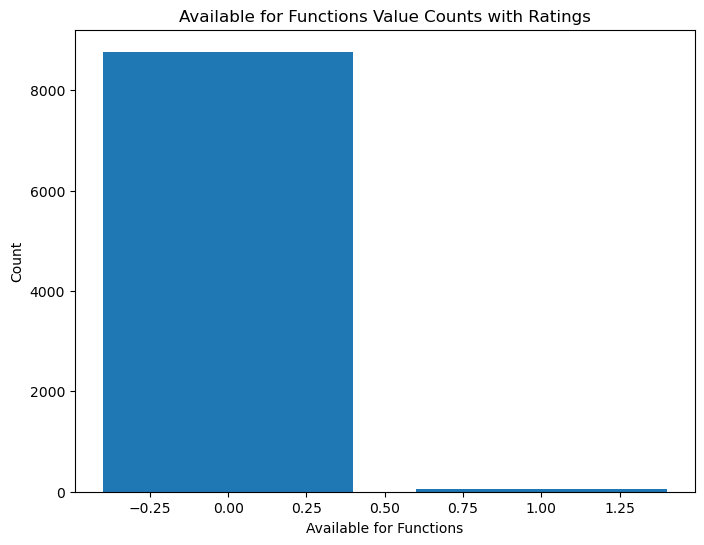

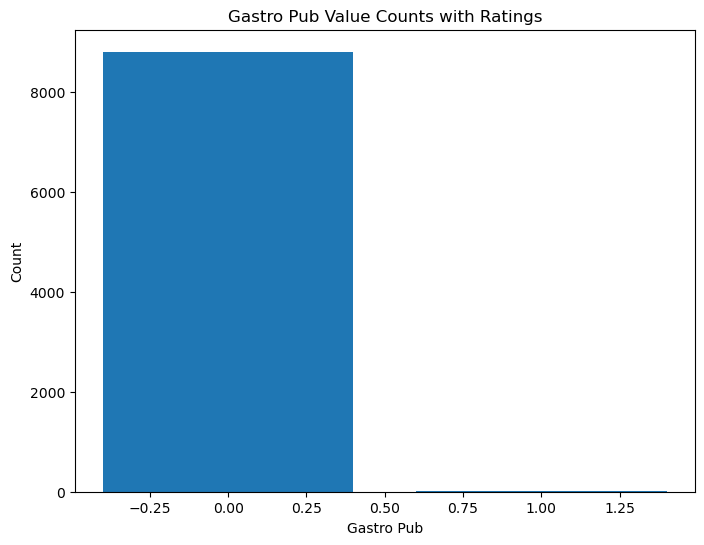

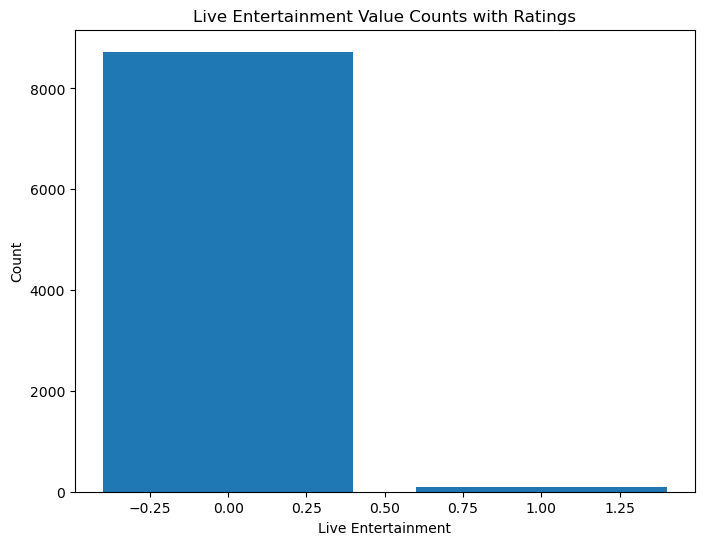

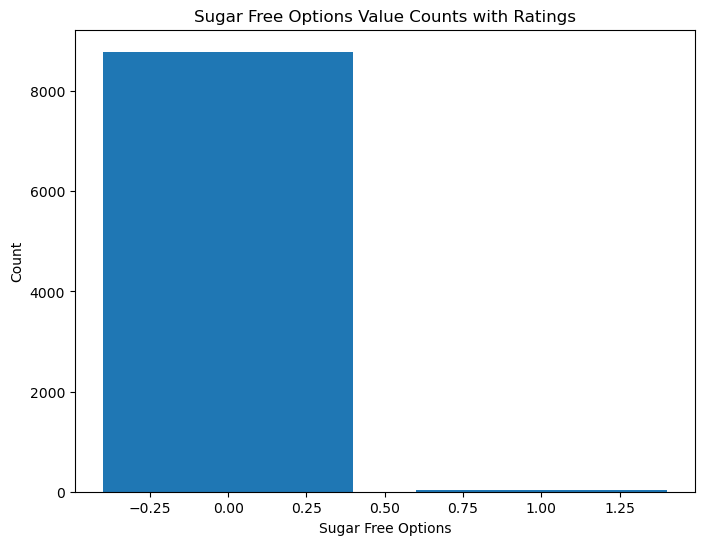

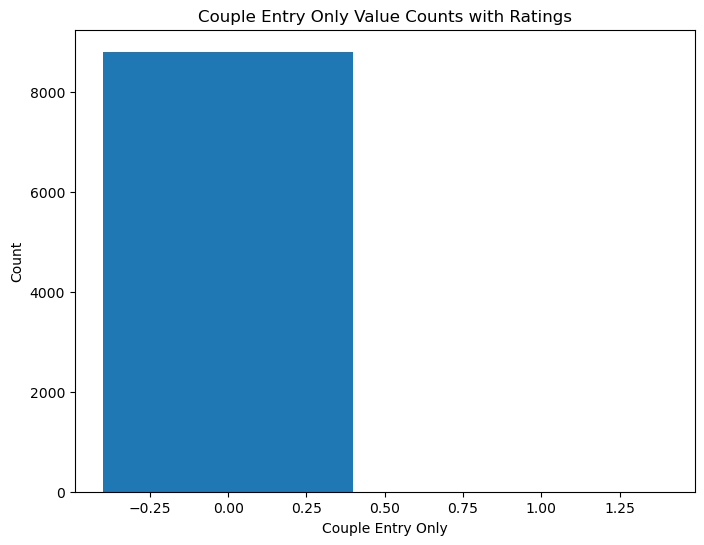

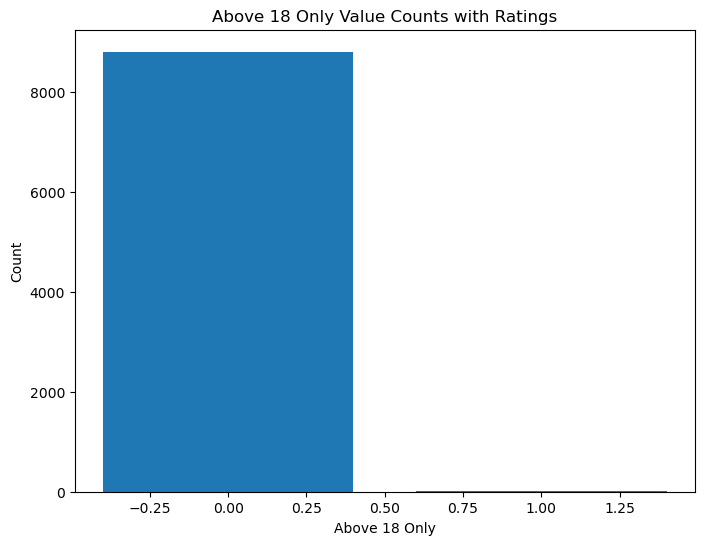

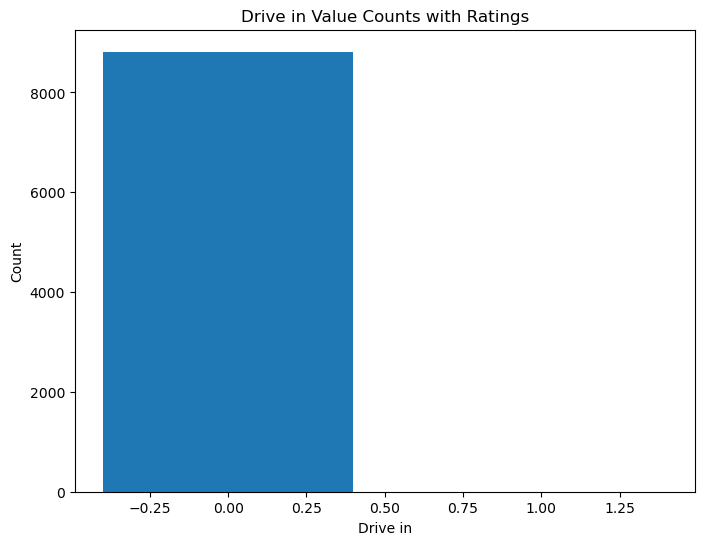

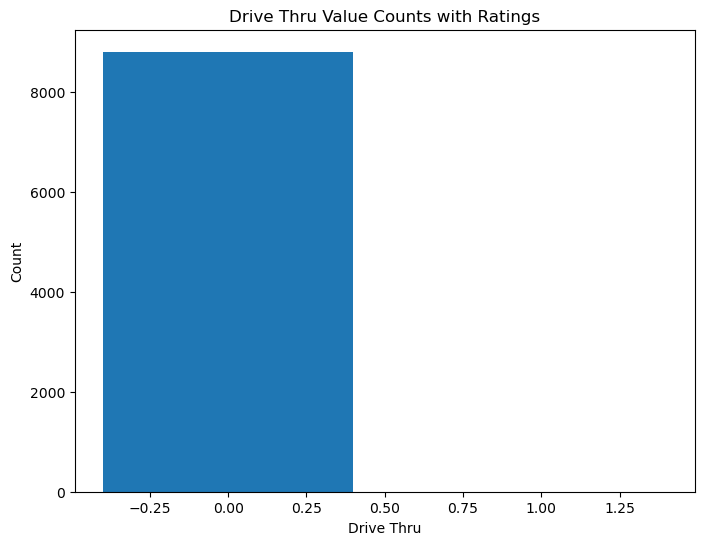

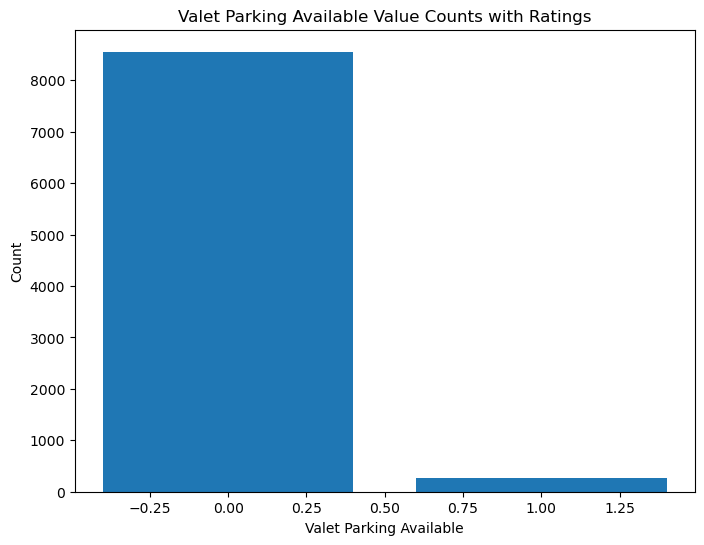

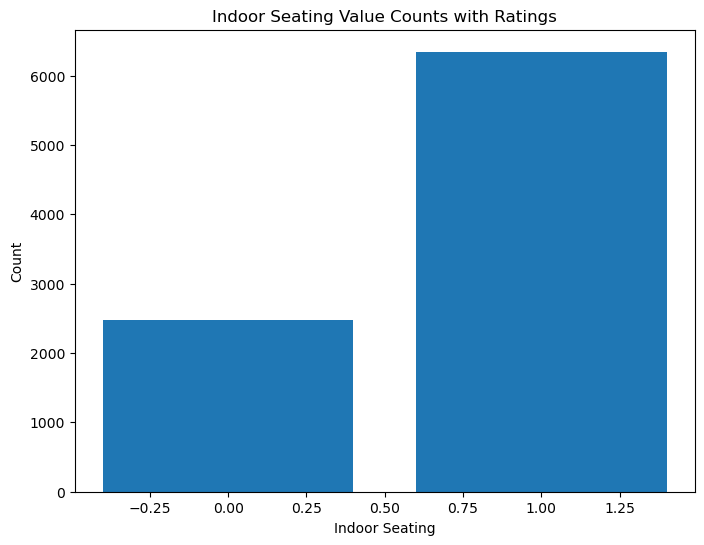

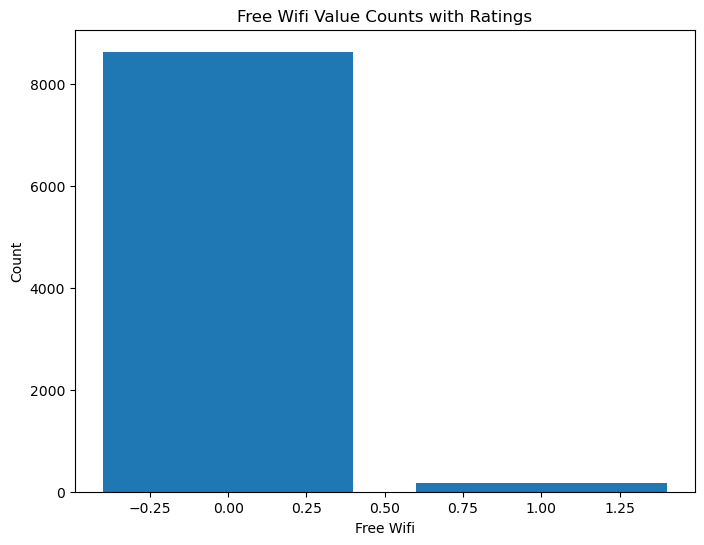

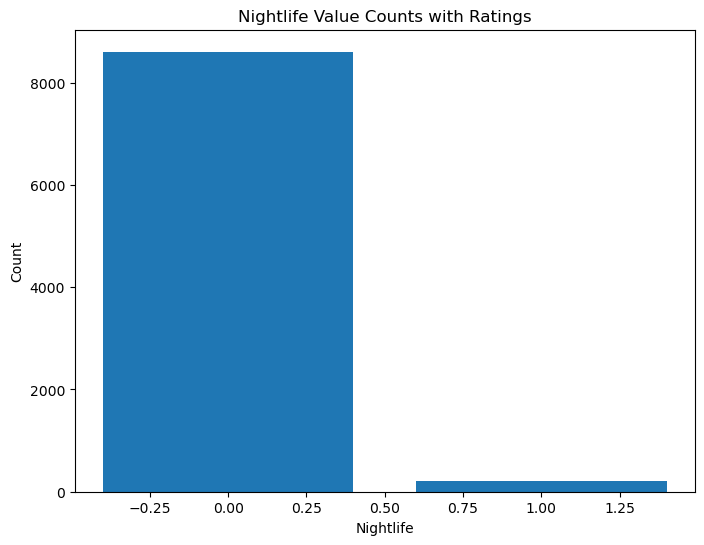

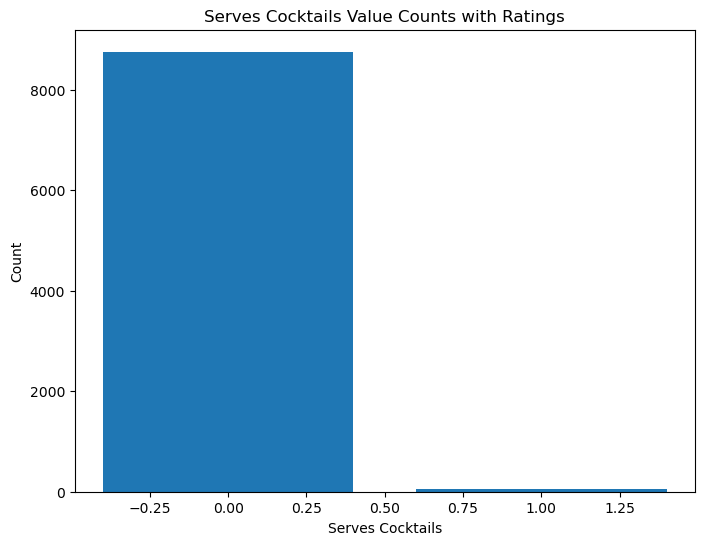

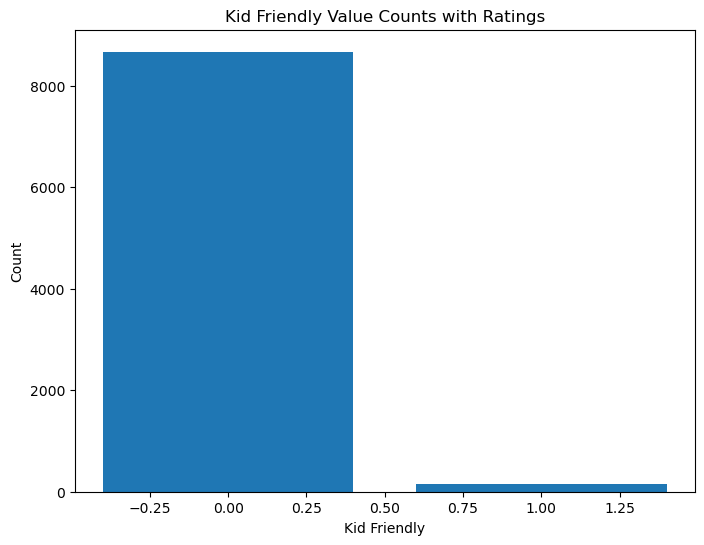

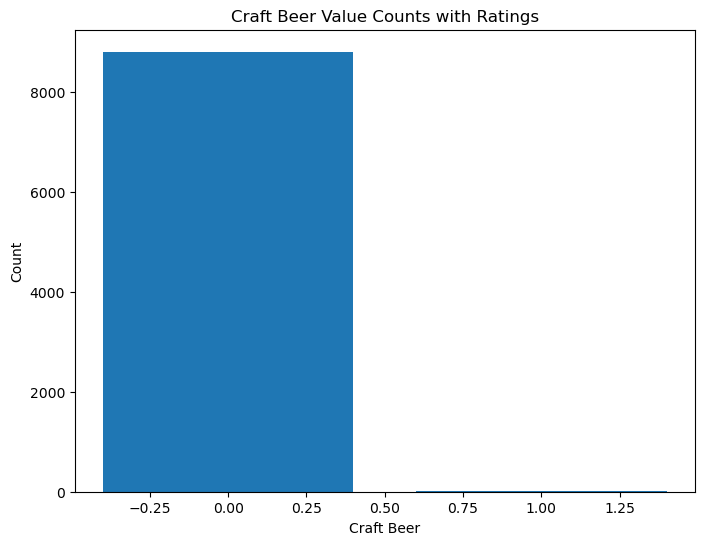

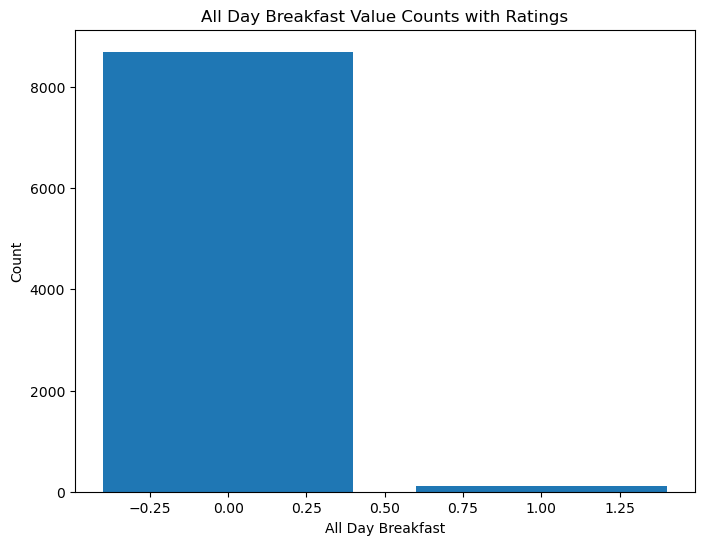

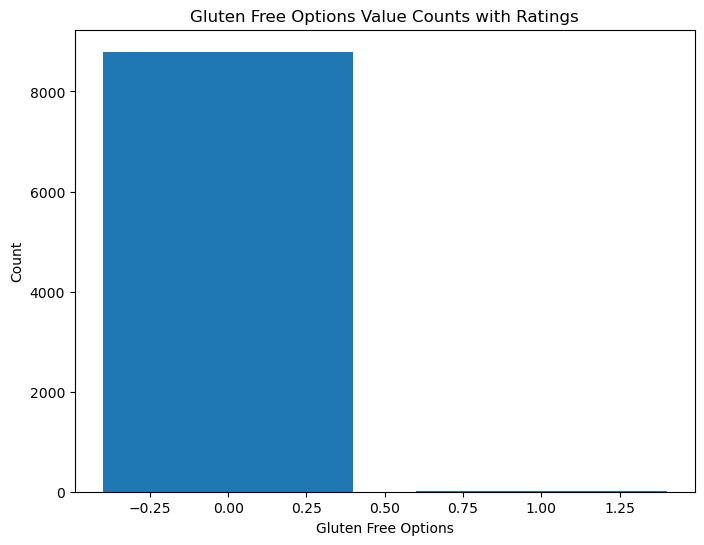

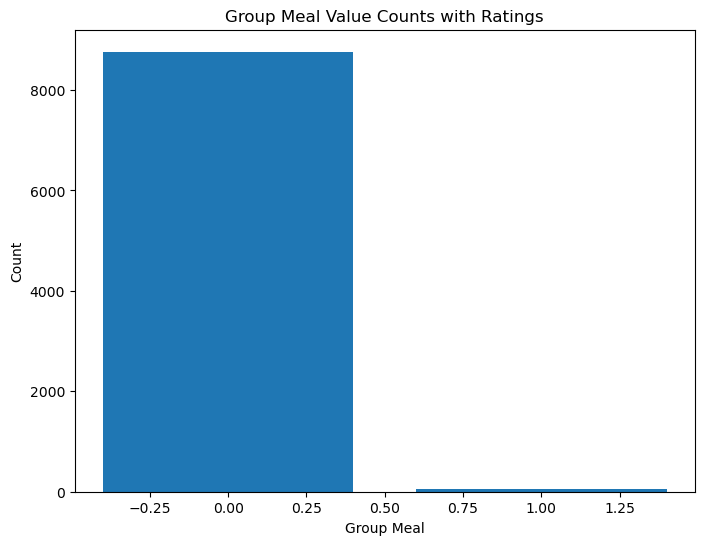

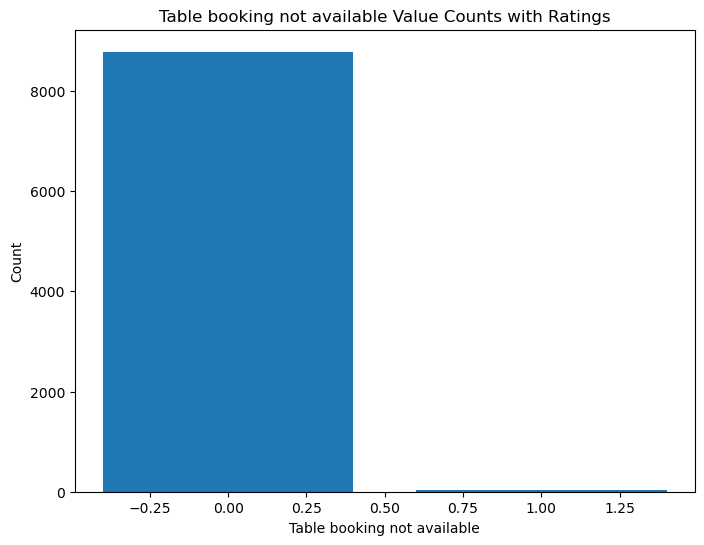

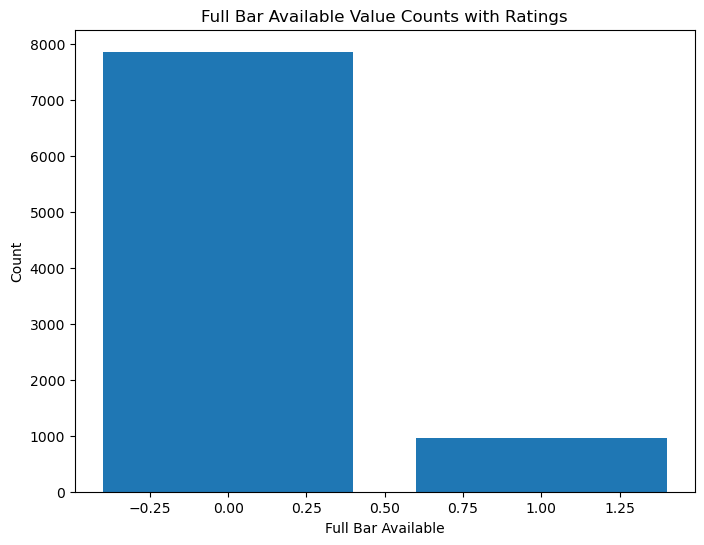

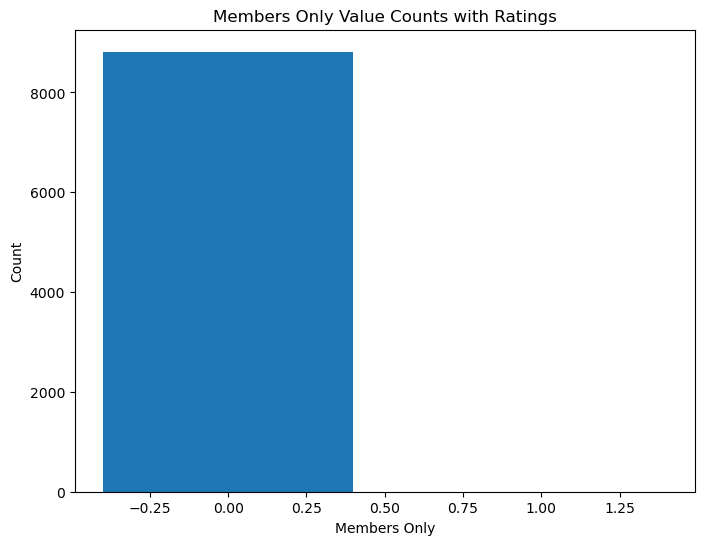

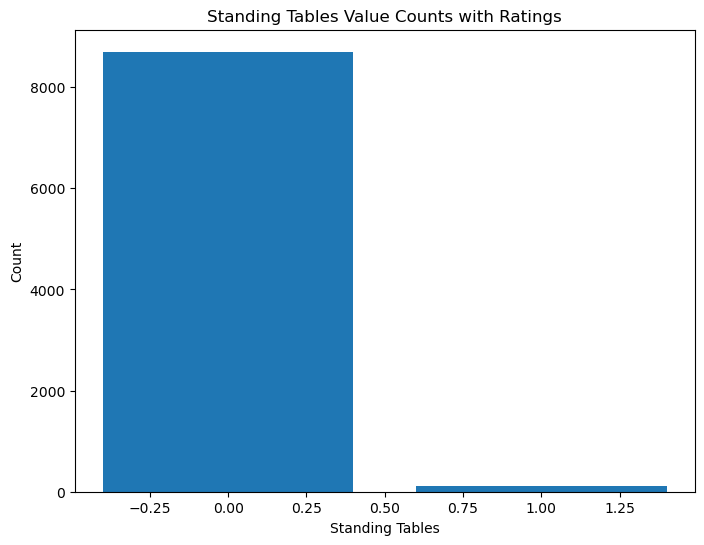

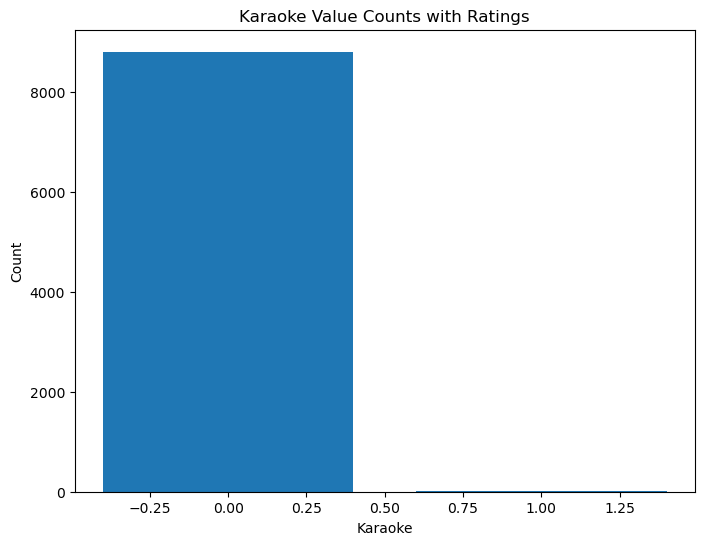

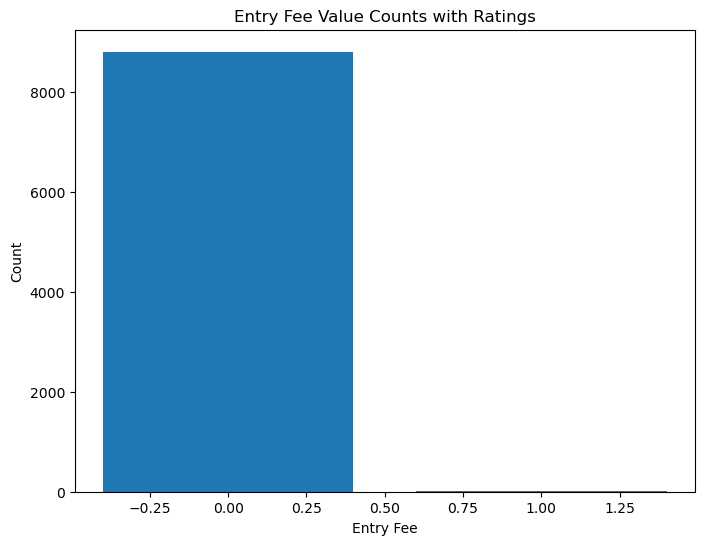

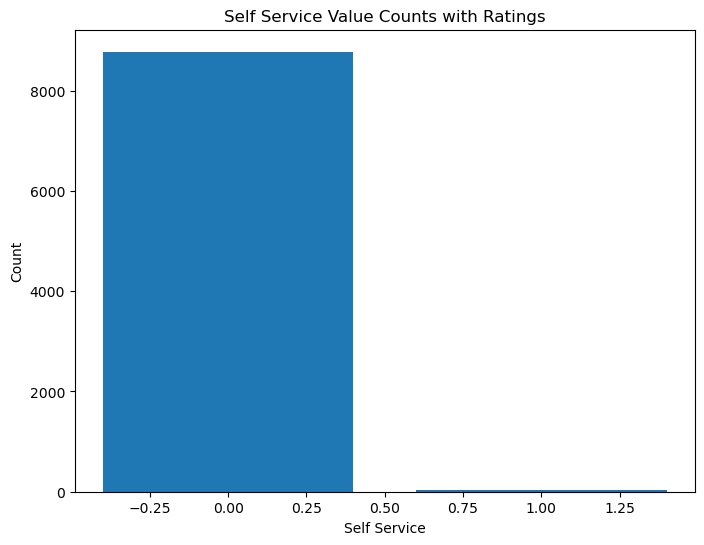

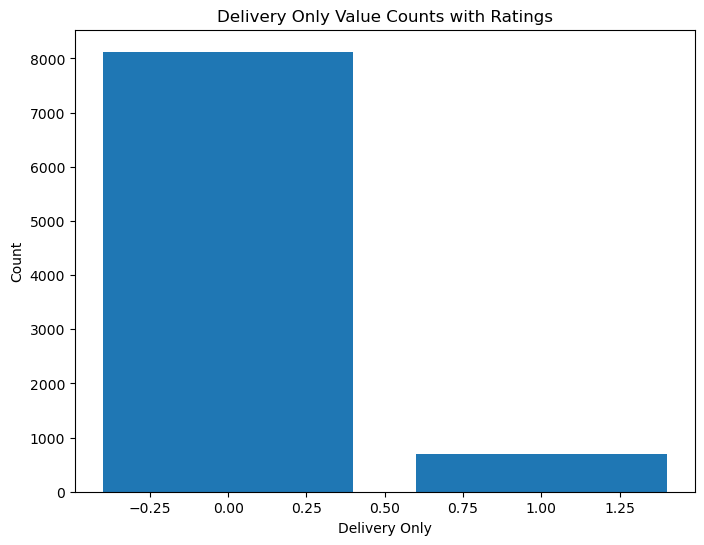

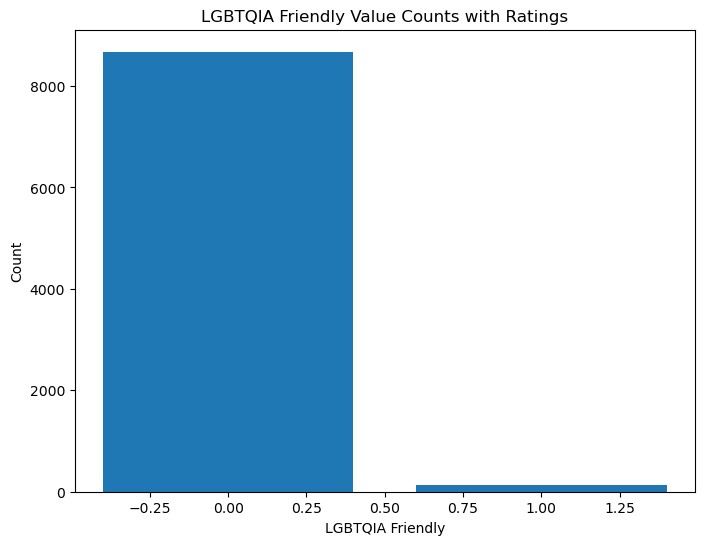

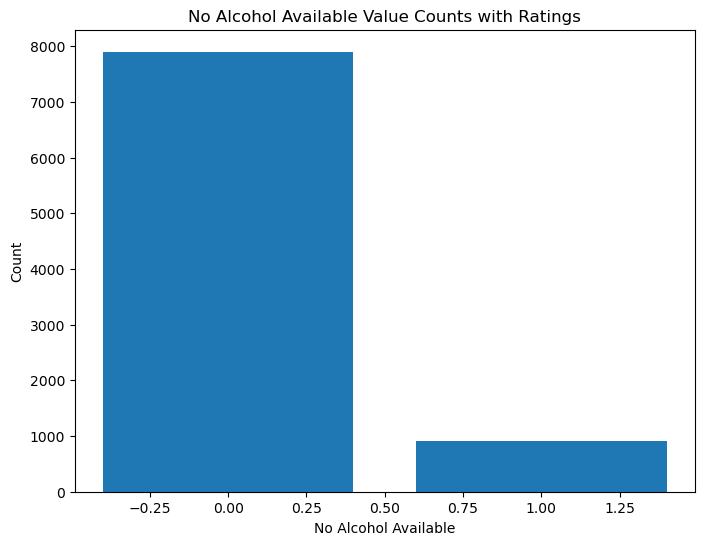

KeyError: 'Unlimited Pizza'

In [83]:
# Specify the columns to compare
columns = ['Pet Friendly', 'Bulk Orders Accepted', 'Gaming Are', 'City View', 'Vegetarian Only', 'Brunch', 'Live Music',
           'Wheelchair Accessible', 'Home Delivery', 'Celebrity Frequented', 'Pre-Ordering Required', 'Pool Table',
           'Keto Options', 'Wifi', 'Sports TV', 'Wine Tasting', 'Beer', 'Restricted Entry', 'Variable Menu',
           'Serves Non Veg', 'Table booking for Groups', 'Poolside', 'Home Baker', 'Wine', 'Buffet', 'Board Games',
           'Vegan Options', 'Table Reservation Not Required', 'Table reservation required', 'Rooftop', 'BYOB',
           'Egg Preparations', 'Live Sports Screening', 'Luxury Dining', 'Seating Not Available', 'Desserts and Bakes',
           'Card Upon Delivery', 'Serves Jain Food', 'Mall Parking', 'Available for Functions', 'Gastro Pub',
           'Live Entertainment', 'Sugar Free Options', 'Couple Entry Only', 'Above 18 Only', 'Drive in', 'Drive Thru',
           'Valet Parking Available', 'Indoor Seating', 'Free Wifi', 'Nightlife', 'Serves Cocktails', 'Kid Friendly',
           'Craft Beer', 'All Day Breakfast', 'Gluten Free Options', 'Group Meal', 'Table booking not available',
           'Full Bar Available', 'Members Only', 'Standing Tables', 'Karaoke', 'Entry Fee', 'Self Service',
           'Delivery Only', 'LGBTQIA Friendly', 'No Alcohol Available', 'Unlimited Pizza', 'Private Dining Area Available',
           'Smoking Area', 'Table booking recommended', 'Resto Bar', 'Serves Alcohol', 'Breakfast', 'Catering Available',
           'Disabled Friendly', 'Serves Halal', 'Takeaway Only', 'BYOB Only']

# Plot a separate graph for each column
for column in columns:
    # Create a DataFrame to store the value counts for the column
    value_counts_df = pd.DataFrame(zp[column].value_counts()).sort_index()

    # Plot the bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts_df.index, value_counts_df[column])
    
    # Set the x-axis label, y-axis label, and plot title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Value Counts with Ratings')
    
    # Show the plot
    plt.show()


### Number Of Restaurants in each area of Pune:


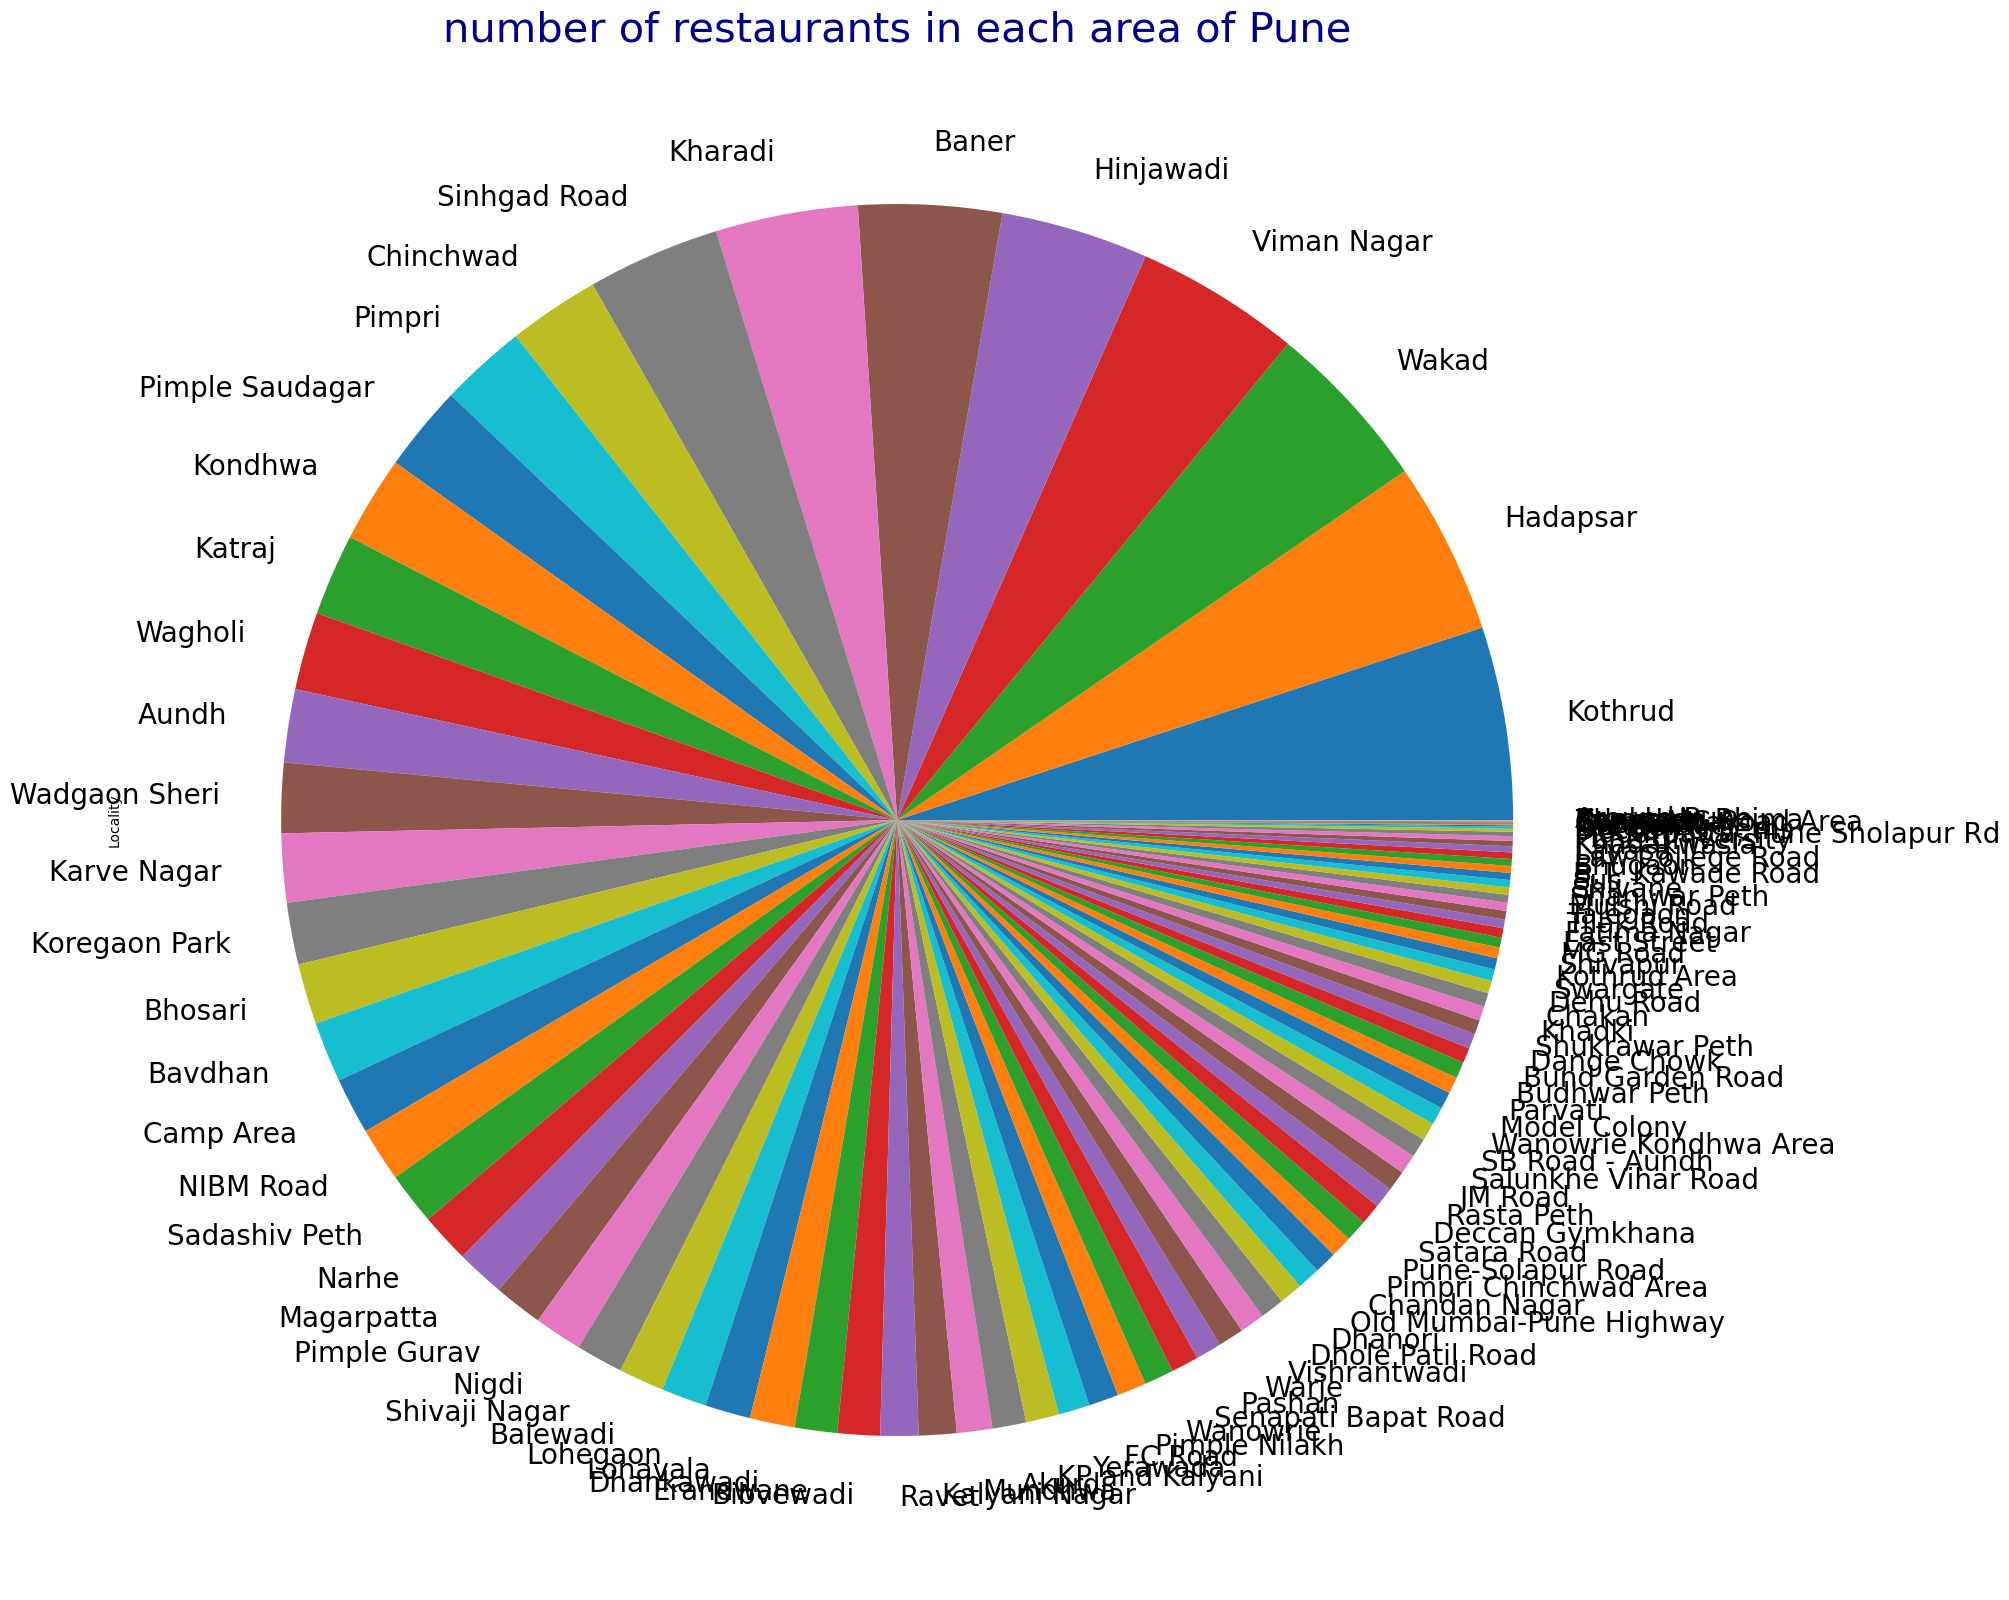

In [84]:
plt.figure(figsize=(20,20))

ax=zp.Locality.value_counts()
ax.plot(kind='pie',fontsize=20)

plt.title('number of restaurants in each area of Pune',fontsize=30,color='darkblue')
plt.show()

### Number of restaurants in each area of pune

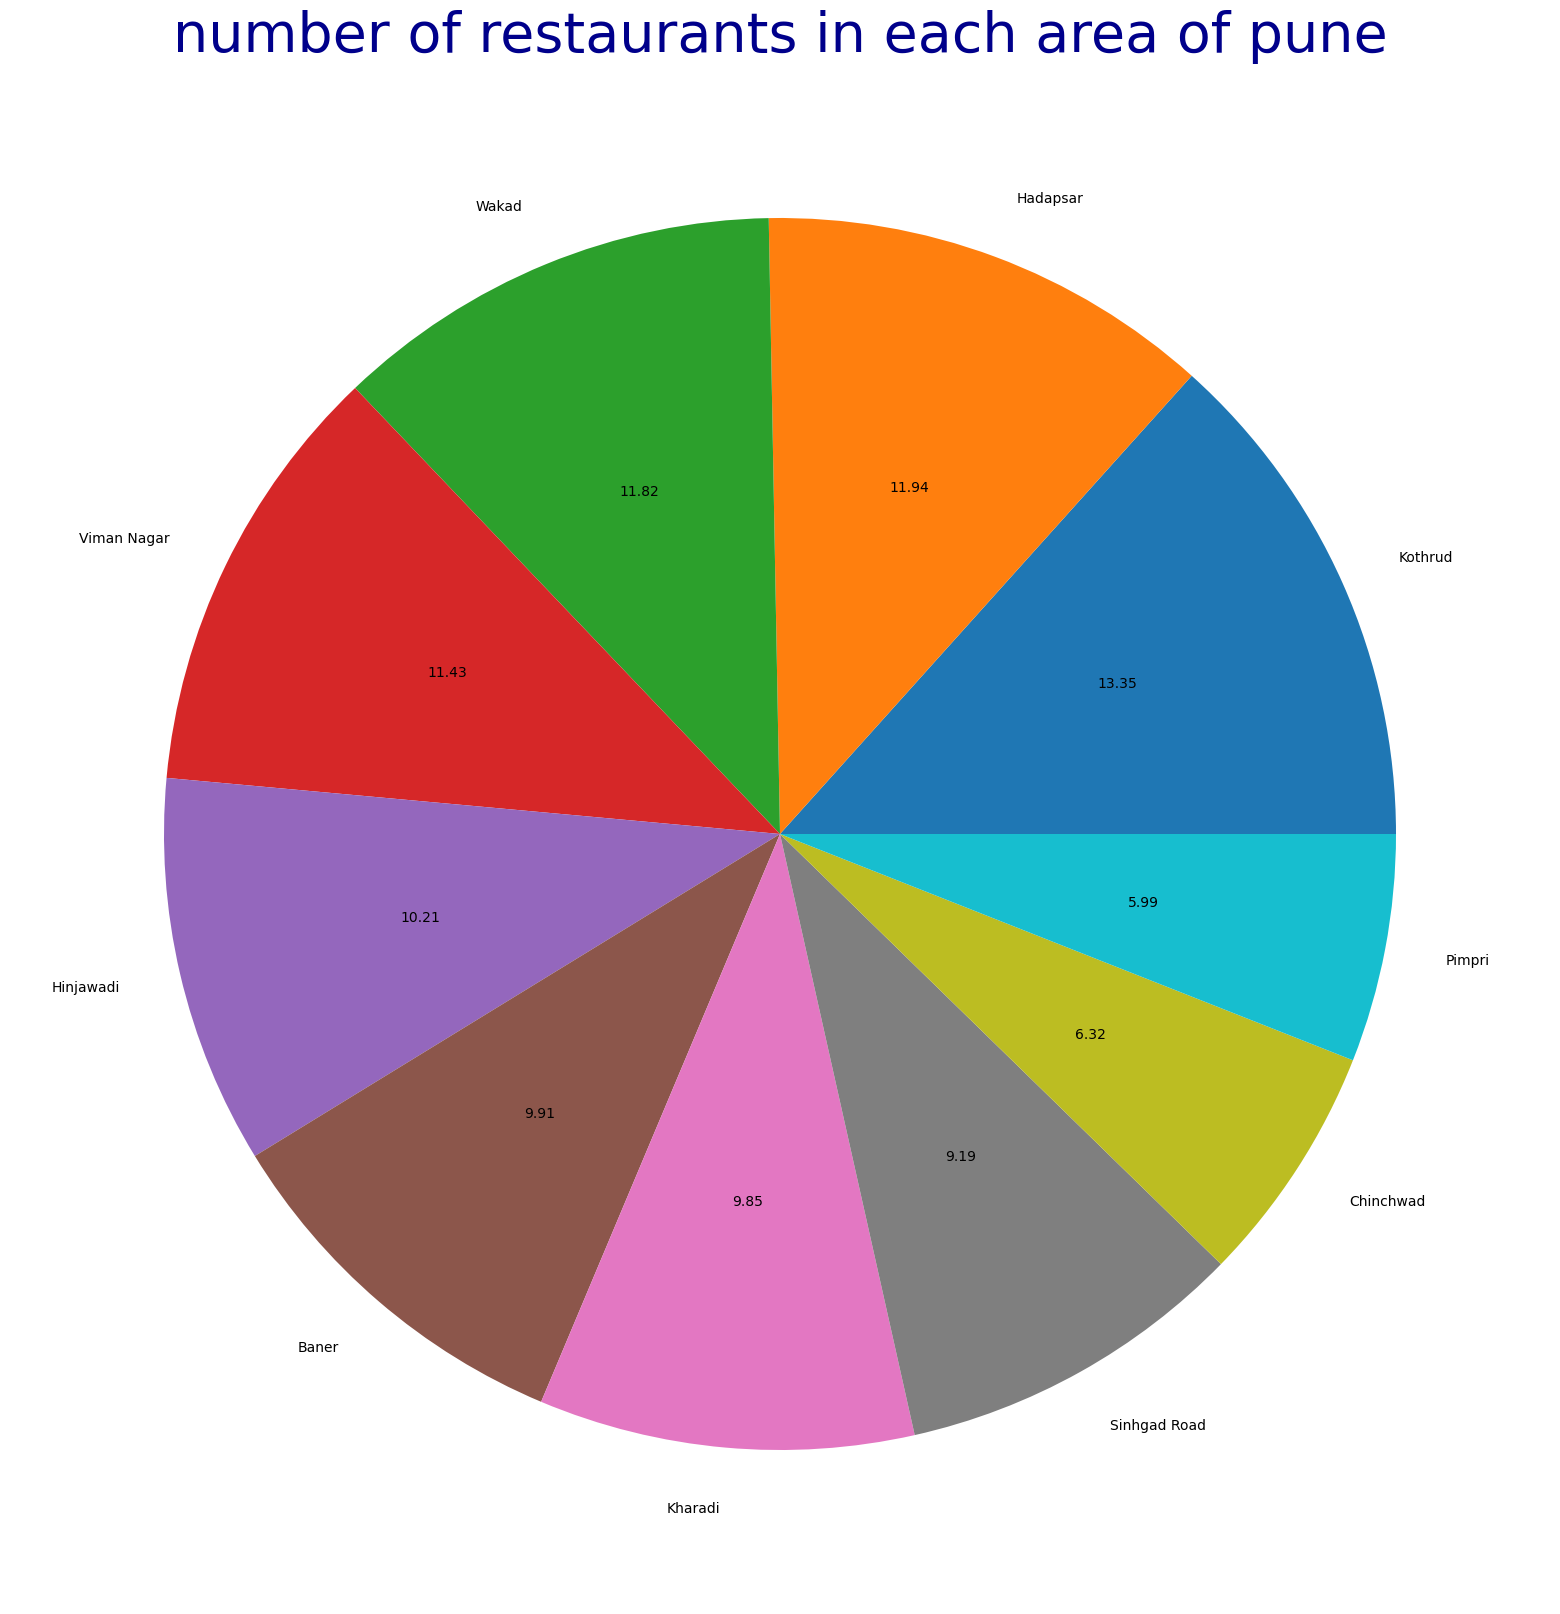

In [85]:
plt.figure(figsize=(20,20))

ax=zp.Locality.value_counts()[:10]
labels=zp['Locality'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('number of restaurants in each area of pune',fontsize=40,color='darkblue')
plt.show()

### Top 10 Location Restaurants

<Axes: >

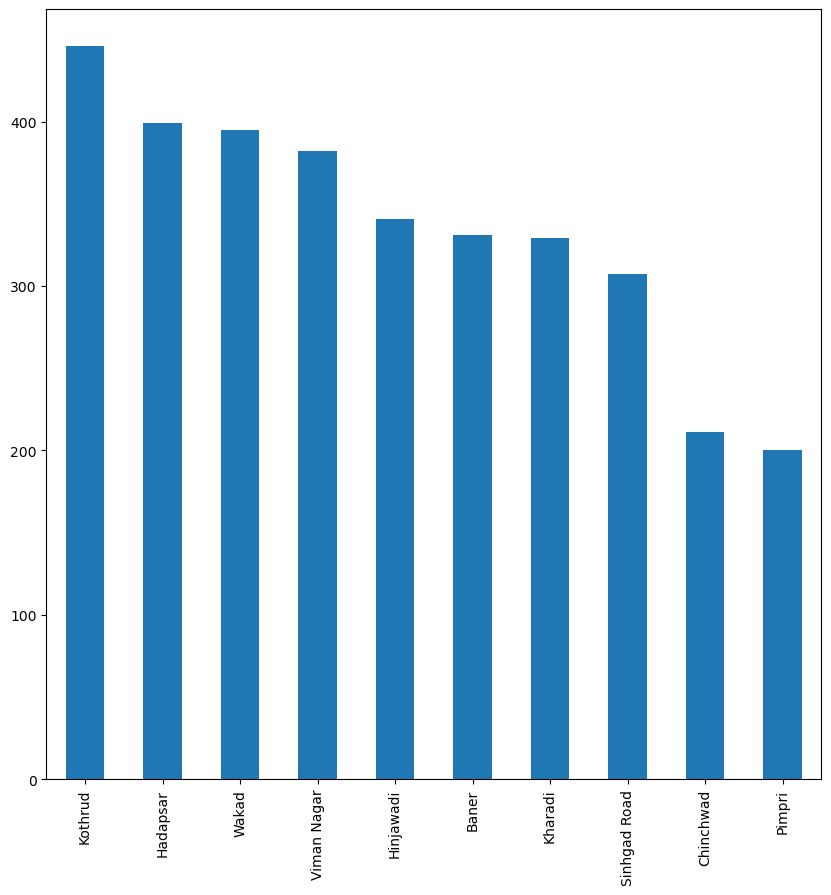

In [86]:
plt.figure(figsize=(10,10))
ax=zp.Locality.value_counts()[:10]
ax.plot(kind='bar')

### Type of Restaurants in City

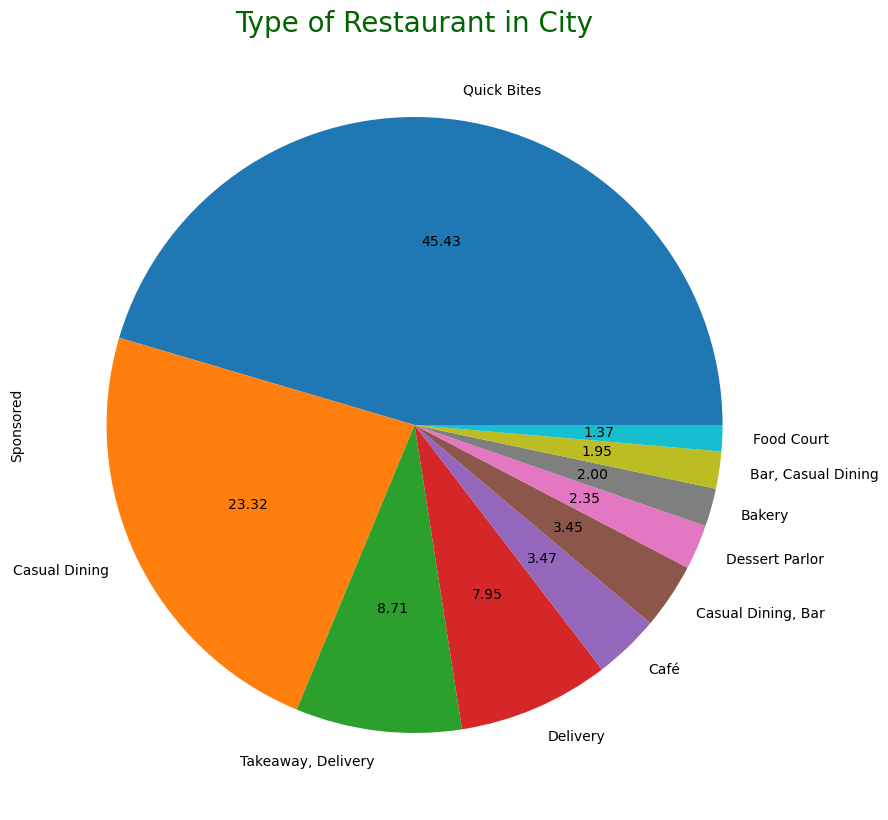

In [87]:
plt.figure(figsize=(10,10))

ax=zp.Sponsored.value_counts()[:10]
label=zp['Sponsored'].value_counts()[:10].index
ax.plot(kind='pie',labels=label,autopct='%.2f')

plt.title("Type of Restaurant in City",fontsize=20,color='darkgreen')
plt.show()

In [88]:
#Drop unwanted Columns:
del zp['Restaurant_Name']
del zp['Locality']
del zp['Sponsored']
del zp['Cuisines']
del zp['payment_modes']
del zp['Rest_timming']


In [89]:
zp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8817 entries, 0 to 12188
Columns: 218 entries, Ratings_out_of_5 to Charges_for_two_Biryani, North Indian
dtypes: float64(4), int32(120), int64(86), uint8(8)
memory usage: 10.2 MB


In [90]:
"""# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(zp.corr(), annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()"""


"# Plot the heatmap\nplt.figure(figsize=(12, 8))\nsns.heatmap(zp.corr(), annot=True, cmap='coolwarm')\n\n# Set the title of the plot\nplt.title('Correlation Heatmap')\n\n# Show the plot\nplt.show()"

### Built Model

In [91]:
zp.shape

(8817, 218)

In [92]:
#all missing values in rows
# Drop rows with missing values
zp.dropna(axis=0,inplace=True)

In [93]:
zp.shape

(7381, 218)

We now split our data into two random parts . One to build model on , Another to test its performance.
Option "random_state" is used to make our random operation reproducible.

In [94]:
# Splitting into Train and Test Sets
zp_train, zp_test= train_test_split(zp, test_size=0.2, random_state=42)

In [95]:
zp_test.shape

(1477, 218)

In [96]:
zp_train.shape

(5904, 218)

### Apply Regressions Models

In [97]:
lm=LinearRegression()

Above line creates and object of class LinearRegression named lm. We can use this object to access all functions realted to LinearRegression.

Now we'll separate predictors and response for both the datasets . We'll also drop ID from predictor's list because it doesnt make sense to include an ID variable in the model. Variable "Amount.Funded.By.Investors" will also be dropped because it wont be available until the loan has been processed. We can use only those variables which are present at the point of the business process where we want to apply our model.

In [98]:
x_train=zp_train.drop(["Ratings_out_of_5"],1)
y_train=zp_train["Ratings_out_of_5"]
x_test=zp_test.drop(["Ratings_out_of_5"],1)
y_test=zp_test["Ratings_out_of_5"]

C:\Users\prath\AppData\Local\Temp\ipykernel_32332\2971560401.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train=zp_train.drop(["Ratings_out_of_5"],1)
C:\Users\prath\AppData\Local\Temp\ipykernel_32332\2971560401.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=zp_test.drop(["Ratings_out_of_5"],1)


In [99]:
# Check the shape of splited data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5904, 217), (1477, 217), (5904,), (1477,))

### Apply Regressions Models

#### 1. Linear Regression

In [100]:
lm.fit(x_train,y_train)

LinearRegression()

In [101]:
y_pred=lm.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.20454496749224482

#### LinearRegression, Ridge, Lasso, ElasticNet

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Create and train different linear models
models = {'Linear Regression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso(),
          'ElasticNet': ElasticNet()}

for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Calculate predictions
    y_pred = model.predict(x_test)
    
    # Print the model's name and evaluation metrics
    print(f"Model: {model_name}")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("")



Model: Linear Regression
Coefficients: [ 5.87109066e-04  3.24998397e-04  5.25725366e-01 -1.32551896e-01
 -3.68315681e-02  9.55561554e-02 -2.97789571e-12  1.18804473e-01
  2.66841530e-01  7.15462064e-02  1.37411779e-01  3.36850472e-01
  2.35177349e-02  3.33002077e-01  1.54786476e-01 -3.90092233e-02
  1.52541784e-01  5.34003964e-01 -1.60173193e+00  5.94556569e-01
  1.22266372e-01  2.41824257e-01  4.10236239e-02  4.91635147e-02
 -4.84791006e-01  3.15991985e-01  2.82472333e-01  7.64388552e-14
  2.06448832e-01 -5.09625654e-02  8.30106321e-02  8.95693446e-02
  5.63258382e-01  1.29275211e-02  7.01647823e-02  2.06097239e-01
 -1.43557908e-02 -2.76442054e-02  4.60380482e-02 -1.81967981e-01
  3.05450110e-14  1.08120425e-01 -7.15064664e-02  1.06742056e-02
  1.12349981e-01 -5.15324589e-01 -2.71836971e-01  1.01388821e-01
 -6.06170174e-02 -4.51008824e-02 -3.57226171e-02  1.10486119e-01
 -4.14364767e-01 -1.08165403e-01  3.31720675e-01 -4.39248269e-01
 -2.52371497e-02 -3.42191041e-02 -5.22998100e-02 -3

### Applying DECISION TREE REGRESSION

In [103]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

In [104]:
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

In [105]:
r2_score(y_test,y_predict)

0.8587028524484295

### Applying RANDOM FOREST REGRESSION

In [106]:
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [107]:
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

In [108]:
r2_score(y_test,y_predict)

0.915323878828288

#### Apply MSE and RMSE Methods

In [109]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.0562696995572651


In [110]:
# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 1.0277498234284768
